# SCANPLOT - Um sistema de plotagem simples para o SCANTEC

<span style="float:right"><img src="img/logo_scantec.png" width=180 height=180 /></span>O SCANPLOT é um módulo escrito em linguagem Python preparado para ler e plotar as tabelas com as estatísticas do Sistema Comunitário de Avaliação de modelos Numéricos de Tempo e Clima (SCANTEC*). O seu uso pode ser feito por meio da linha de comando ou através do Jupyter. O SCANPLOT transforma as tabelas do SCANTEC em dataframes do Pandas e pode ser facilmente extendido a partir da introdução de funções para a plotagem destes dataframes na forma como o usuário precisar.

O módulo `scanplot` possui as seguintes funções:

1. `read_namelists`: esta função lê os arquivos de namelist e definições dos modelos do SCANTEC;
2. `get_dataframe`: esta função transforma uma ou mais tabelas em dataframes do Pandas, acessíveis por meio de um dicionário;
3. `plot_lines`: esta função plota gráficos de linhas a partir dos dataframes;
4. `plot_scorecard`: esta função plota um scorecard a partir dos dataframes;
5. `plot_dTaylor`: esta função plota um diagrama de Taylor a partir dos dataframes.

As funções possuem formas específicas de utilização. Para saber como utilizá-las, carregue primeiro a função a partir do módulo principal (por exemplo, a função `read_namelists`):

```Python
from scanplot import read_namelists
```

E em seguida, digite uma das duas formas a seguir:

```Python
help(read_namelists)
```

ou

```Python
print(red_namelists.__doc__)
```

---
*[de MATTOS, J. G. Z.](http://lattes.cnpq.br/4563659436339486); [SAPUCCI, L. F.](http://lattes.cnpq.br/8285827971934692). **SCANTEC - SISTEMA COMUNITÁRIO DE AVALIAÇÃO DE MODELOS NUMÉRICOS DE TEMPO E CLIMA. 2017.** Patente: Programa de Computador. Número do registro: BR512017000576-1, data de registro: 30/01/2017, Instituição de registro: INPI - Instituto Nacional da Propriedade Industrial. 

## Leitura dos namelists do SCANTEC

O SCANTEC é um software de linha de comando escrito em linguagem Fortran preparado para ler, interpolar e calcular as estatísticas básicas (Viés, Raiz do Erro Quadrático Médio e Correlação de Anomalias) a partir de modelos de previsão numérica de tempo, como os modelos BAM, BRAMS e Eta. O SCANPLOT faz o trabalho de plotar os resultados a partir das tabelas com o resumo destas estatísticas. Para utilizar o SCANPLOT, o usuário deve ler os arquivos de namelist e definições dos modelos utilizados nas avaliações de forma que o software saiba quais foram as definições utilizadas pelo usuário e em que local estão armazenadas as tabelas com os resultados.

Para isso, basta carregar a função `read_namelists` a partir do módulo principal `scanplot`, com o seguinte comando:

In [1]:
from scanplot import read_namelists

Para conhecer como deve ser utilizada a função `read_namelists`, o usuário pode utilizar um dos comandos a seguir:

In [2]:
print(read_namelists.__doc__)
#help(read_namelists)


    read_namelists
    
    Esta função lê os namelists e arquivos de definições dos modelos do SCANTEC e
    retorna para o usuário dois dicionários, VarsLevs e Confs, com as informações lidas.
    
    Parâmetros de entrada
    ---------------------
        basepath : diretório raiz da instalação do SCANTEC.
        
    Resultados
    ----------
        VarsLevs : dicionário com as variáveis, níveis e nomes definidos no arquivo scantec.vars
        Confs    : dicionário com as definições contidas no arquivo scantec.conf
    
    Uso
    ---
        from scanplot import read_namelists
        
        data_vars, data_conf = read_namelists("~/SCANTEC")
    


A função `read_namelists` recebe um caminho (raiz da instalação do SCANTEC) como parâmetro de entrada e retorna para o usuário dois dicionários, os quais contém as informações dos arquivos `scantec.conf` e `scantec.vars` do SCANTEC. Estes arquivos possuem as definições dos modelos (intervalo de tempo da avalação, nome do modelo, resolução, caminhos etc). Os nomes `data_vars` e `data_conf` são os nomes dos objetos que serão criados e que conterão os dicionários com as definições dos arquivos `scantec.vars` e `scantec.conf`, respectivamente. A escolha destes nomes fica a critério do usuário.

In [3]:
data_vars, data_conf = read_namelists("/Volumes/RAID0/carlos/Documents/INPE2020/SCANTEC/ilopolis/SCANTEC.2.0.0b1")

Para inspecionar o conteúdo e a estrutura dos dados contidos nos objetos `data_conf` e `data_vars`, basta digitar os nomes no prompt:

In [4]:
data_conf

{'Starting Time': datetime.datetime(2014, 12, 12, 0, 0),
 'Ending Time': datetime.datetime(2014, 12, 12, 12, 0),
 'Analisys Time Step': '12',
 'Forecast Time Step': '12',
 'History Time': '48',
 'scantec tables': '/Volumes/RAID0/carlos/Documents/INPE2020/SCANTEC/ilopolis/SCANTEC.2.0.0b1/tables',
 'run domain number': '1',
 'run domain lower left lat': '-49.875',
 'run domain lower left lon': '-82.625',
 'run domain upper right lat': '-35.375',
 'run domain upper right lon': '11.375',
 'run domain resolution dx': '0.5625000000',
 'run domain resolution dy': '0.5625000000',
 'Reference Model Name': 'BAM_TQ0213L042_33levs',
 'Reference file': '/dados/ensemble/dsk002/oensMB09_aval/bam/bam/pos/dataout/TQ0213L042/%y4%m2%d2%h2/CTR/GPOSCTR%y4%m2%d2%h2%y4%m2%d2%h2P.icn.TQ0213L042.ctl',
 'Experiments': {'EX01P': ['BAM_TQ0213L042_33levs',
   '/dados/ensemble/dsk002/oensMB09_aval/bam/bam/pos/dataout/TQ0213L042/%y4%m2%d2%h2/01P/GPOS01P%iy4%im2%id2%ih2%fy4%fm2%fd2%fh2P.fct.TQ0213L042.ctl'],
  'EX01N

In [5]:
data_vars

{0: ('TEMP:850', 'Absolute Temperature @ 850 hPa [K]'),
 1: ('TEMP:500', 'Absolute Temperature @ 500 hPa [K]'),
 2: ('TEMP:250', 'Absolute Temperature @ 250 hPa [K]'),
 3: ('PSNM:000', 'Pressure reduced to MSL [hPa]'),
 4: ('UMES:925', 'Specific Humidity @ 925 hPa [g/Kg]'),
 5: ('UMES:850', 'Specific Humidity @ 850 hPa [g/Kg]'),
 6: ('UMES:500', 'Specific Humidity @ 500 hPa [g/Kg]'),
 7: ('AGPL:925', 'Inst. Precipitable Water @ 925 hPa [Kg/m2]'),
 8: ('ZGEO:850', 'Geopotential height @ 850 hPa [gpm]'),
 9: ('ZGEO:500', 'Geopotential height @ 500 hPa [gpm]'),
 10: ('ZGEO:250', 'Geopotential height @ 250 hPa [gpm]'),
 11: ('UVEL:850', 'Zonal Wind @ 850 hPa [m/s]'),
 12: ('UVEL:500', 'Zonal Wind @ 500 hPa [m/s]'),
 13: ('UVEL:250', 'Zonal Wind @ 250 hPa [m/s]'),
 14: ('VVEL:850', 'Meridional Wind @ 850 hPa [m/s]'),
 15: ('VVEL:500', 'Meridional Wind @ 500 hPa [m/s]'),
 16: ('VVEL:250', 'Meridional Wind @  250 hPa [m/s]')}

Com as informações dos arquivos de namelist do SCANTEC carregados, o próximo passo é ler as tabelas geradas na avaliação com o SCANTEC e transformá-las em dataframes do Pandas. Para isso, o usuário deverá utilizar a função `get_dataframe` do módulo `scanplot`:

In [6]:
from scanplot import get_dataframe

Da mesma forma como foi feito com a função `read_namelists`, pode-se digitar o comando `print(funcao.__doc__)` ou simplesmente, `help(funcao)` para descobrir como a função deve ser utilizada:

In [7]:
#print(get_dataframe.__doc__)
help(get_dataframe)

Help on function get_dataframe in module scanplot:

get_dataframe(dataInicial, dataFinal, Stats, Exps, outDir)
    get_dataframe
    
    Esta função transforma a(s) tabela(s) do SCANTEC em dataframe(s).
    
    Parâmetros de entrada
    ---------------------
        dataInicial : objeto datetime com a data inicial do experimento
        dataFinal   : objeto datetime com a data final do experimento
        Stats       : lista com os nomes das estatísticas a serem processadas
        Exps        : lista com os nomes dos experimentos
        outDir      : string com o diretório com as tabelas do SCANTEC
    
    Resultado
    ---------
        Dicionário com o(s) dataframe(s) com a(s) tabela(s) do SCANTEC.
    
    Uso
    ---
        from scanplot import read_namelists, get_dataframe
        
        data_vars, data_conf = read_namelists("~/SCANTEC")
        
        dataInicial = data_conf["Starting Time"]
        dataFinal = data_conf["Ending Time"]
        Stats =  ["ACOR", "RMSE", 

A função `get_dataframe` recebe uma série de parâmetros de entrada e retorna um dicionário com uma ou mais tabelas que já estarão no formado de dataframe do Pandas. Na célula a seguir, serão definidos os valores de entrada da função `get_dataframe` a partir dos dicionários `data_conf` e `data_vars`, criados anteriormente.

Observe que os parâmetros `Vars` e `Stats` são atribuídos de formas diferentes dos demais. O parâmetro `Stats` é uma lista que deve possuir pelo menos um elemento e ele sempre deve possuir a forma `Stat = [...]`. Na versão atual do SCANPLOT, o usuário pode escolher as estatísticas `ACOR` (correlação de anomalias), `RMSE` (raiz do erro quadrático médio) e `VIES` (viés), em qualquer ordem ou combinação entre elas. O parâmetro `Vars` também é uma lista, mas é definido de forma diferente. O usuário deve observar que no dicionário `data_vars`, para cada índice está associado uma tupla do tipo `('VAR:LEV', 'Nome da Variável @ Nível hPa [unidade]')`.  Isto foi feito para facilitar ao usuário a escolha da variável, pois ao invés de se digitar o nome da variável, basta escolher pelo menos um dos índices do dicionário `data_vars` que deseja, da seguinte forma `Vars = list(map(data_vars.get,[1,2,3,...]`. 

In [8]:
dataInicial = data_conf["Starting Time"]
dataFinal = data_conf["Ending Time"]
Vars = list(map(data_vars.get,[11,12,13])) # ou [*map(data_vars.get,[12,14])]
Stats = ["ACOR", "RMSE", "VIES"]
Exps = list(data_conf["Experiments"].keys()) # ou [*data_conf["Experiments"].keys()]
outDir = data_conf["Output directory"]

Com a definição dos parâmetros de entrada da função `get_dataframe`, a sua utilização é feita da seguinte forma:

In [9]:
dTable = get_dataframe(dataInicial,dataFinal,Stats,Exps,outDir)

Na chamada da função `get_dataframe`, o objeto `dTable` é um dicionário que deverá conter as tabelas escolhidas pelo usuário a partir do ajuste dos parâmetros de entrada da função. Para inspecionar o conteúdo do dicionário `dTable`, basta digitar no prompt:

In [10]:
dTable

{'ACOREX01P_20141212002014121212T.scan':     %Previsao  temp:850  temp:500  temp:250  psnm:000  umes:925  umes:850  \
 0           0       NaN       NaN       NaN       NaN       NaN       NaN   
 1          12     0.951     0.942     0.899     0.956     0.917     0.933   
 2          24     0.952     0.946     0.905     0.958     0.901     0.900   
 3          36     0.929     0.926     0.876     0.922     0.860     0.848   
 4          48     0.889     0.911     0.840     0.899     0.858     0.853   
 5          60     0.892     0.911     0.880     0.936     0.877     0.859   
 6          72     0.910     0.902     0.870     0.954     0.885     0.846   
 7          84     0.905     0.892     0.842     0.955     0.862     0.822   
 8          96     0.879     0.861     0.830     0.944     0.806     0.770   
 9         108     0.853     0.816     0.888     0.929     0.779     0.758   
 10        120     0.853     0.784     0.925     0.925     0.775     0.768   
 11        132     0.853

No dicionário `dTable`, observe que foram carregadas as tabelas referente às estatísticas escolhidas (`VIES`, `RMS` e `ACOR`). Para visualizar o dataframe da tabela, basta passar o nome da tabela como key do dicionário dTable, como em `dTable['NOME_TABELA']`. Veja o exemplo a seguir:

In [11]:
dTable['ACOREX07N_20141212002014121212T.scan']

%Previsao  temp:850  temp:500  temp:250  psnm:000  umes:925  umes:850  \
0           0       NaN       NaN       NaN       NaN       NaN       NaN   
1          12     0.948     0.942     0.900     0.956     0.915     0.935   
2          24     0.956     0.947     0.906     0.958     0.904     0.902   
3          36     0.929     0.926     0.878     0.923     0.858     0.845   
4          48     0.887     0.912     0.845     0.903     0.859     0.856   
5          60     0.889     0.911     0.880     0.935     0.874     0.858   
6          72     0.911     0.904     0.867     0.953     0.883     0.843   
7          84     0.905     0.891     0.842     0.952     0.857     0.821   
8          96     0.880     0.861     0.829     0.942     0.808     0.772   
9         108     0.851     0.815     0.886     0.931     0.775     0.755   
10        120     0.851     0.786     0.926     0.926     0.767     0.766   
11        132     0.855     0.741     0.863     0.837     0.788     0.771   
12        144     0.799     0.642     0.828     0.753     0.764     0.798   
13        156     0.696     0.639     0.760     0.770     0.693     0.758   
14        168     0.619     0.661     0.690     0.749     0.590     0.656   
15        180     0.604     0.669     0.631     0.651     0.578     0.633   
16        192     0.639     0.730     0.682     0.571     0.604     0.634   
17        204     0.729     0.796     0.642     0.592     0.647     0.667   
18        216     0.783     0.821     0.565     0.523     0.683     0.680   
19        228     0.776     0.757     0.583     0.470     0.649     0.665   
20        240     0.749     0.562     0.625     0.475     0.645     0.645   
21        252     0.659     0.528     0.706     0.470     0.661     0.689   
22        264     0.654     0.564     0.718     0.438     0.669     0.708   
23        276     0.679     0.425     0.632     0.298     0.660     0.738   
24        288     0.618     0.246     0.366     0.225     0.639     0.705   
25        300     0.444     0.073     0.047     0.167     0.530     0.624   
26        312     0.181    -0.042    -0.076     0.076     0.343     0.494   
27        324     0.067    -0.060     0.013     0.247     0.274     0.412   
28        336     0.141     0.078     0.199     0.522     0.290     0.366   
29        348     0.290     0.245     0.509     0.722     0.357     0.360   
30        360     0.457     0.348     0.769     0.806     0.476     0.450   

    umes:500  agpl:925  zgeo:850  zgeo:500  zgeo:250  uvel:850  uvel:500  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1      0.920     0.953     0.963     0.980     0.980     0.891     0.883   
2      0.890     0.917     0.963     0.977     0.977     0.912     0.892   
3      0.868     0.863     0.941     0.965     0.965     0.916     0.931   
4      0.834     0.879     0.937     0.957     0.957     0.916     0.939   
5      0.770     0.889     0.948     0.951     0.951     0.905     0.931   
6      0.683     0.892     0.953     0.946     0.946     0.871     0.931   
7      0.663     0.878     0.948     0.938     0.938     0.871     0.927   
8      0.646     0.856     0.947     0.933     0.933     0.882     0.903   
9      0.675     0.842     0.952     0.937     0.937     0.880     0.878   
10     0.657     0.827     0.946     0.943     0.943     0.830     0.880   
11     0.616     0.792     0.868     0.906     0.906     0.764     0.880   
12     0.630     0.734     0.800     0.833     0.833     0.781     0.882   
13     0.636     0.646     0.809     0.783     0.783     0.818     0.873   
14     0.502     0.526     0.806     0.754     0.754     0.699     0.839   
15     0.325     0.496     0.753     0.740     0.740     0.615     0.827   
16     0.248     0.493     0.717     0.760     0.760     0.547     0.781   
17     0.309     0.524     0.718     0.809     0.809     0.554     0.764   
18     0.346     0.589     0.634     0.818     0.818     0.453     0.790   
19     0.377     0.

## Explorando os dataframes

Dataframes do Pandas são dados tabulados que possuem uma série de funções e métodos que podem ser aplicados também com as tabelas do SCANTEC. Veja nos exemplos a seguir forma de selecionar as colunas e plotar os dados de forma individual ou agrupada.

No exemplo a seguir, é feita a seleção da coluna referente à correleção de anomalias da temperatura absoluta em 850 hPa. Para isso, utiliza-se o método `loc` para fazer a subseleção do dataframe. O método `loc` em um dataframe indexa os valores da tabela a partir dos índices da linha e da coluna, respectivamente (`loc[linha,coluna]`):

In [12]:
dTable['ACOREX07N_20141212002014121212T.scan'].loc[:,"temp:850"]

0       NaN
1     0.948
2     0.956
3     0.929
4     0.887
5     0.889
6     0.911
7     0.905
8     0.880
9     0.851
10    0.851
11    0.855
12    0.799
13    0.696
14    0.619
15    0.604
16    0.639
17    0.729
18    0.783
19    0.776
20    0.749
21    0.659
22    0.654
23    0.679
24    0.618
25    0.444
26    0.181
27    0.067
28    0.141
29    0.290
30    0.457
Name: temp:850, dtype: float64

O dataframe do Pandas permite também realizar a plotagem da subseleção realizada utilizando a função `plot()`. Veja no exemplo a seguir:

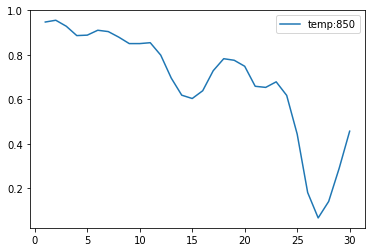

In [13]:
dTable['ACOREX07N_20141212002014121212T.scan'].loc[:,["temp:850"]].plot()

Com o método `loc`, é possível também escolher mais do que uma coluna. Veja o exemplo a seguir e compare-o com o exemplo anterior:

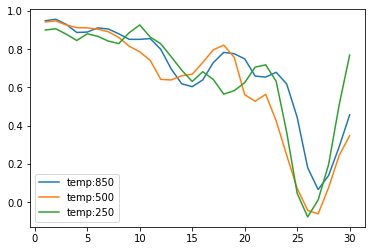

In [14]:
dTable['ACOREX07N_20141212002014121212T.scan'].loc[:,["temp:850", "temp:500", "temp:250"]].plot()

O método `loc` realiza a indexação a partir dos rótulos das colunas. Utilize o método `iloc` para realizar a subseleção a partir dos índices das linhas e colunas:

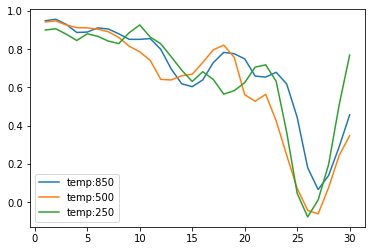

In [15]:
axes = dTable['ACOREX07N_20141212002014121212T.scan'].iloc[:,1:4].plot()

Quando múltiplas colunas são selecionadas, pode-se optar pela plotagem em grupo. Para isso, basta passar o argumento `subplots=True` para dentro da função `plot()`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe818d08f10>,
      dtype=object)

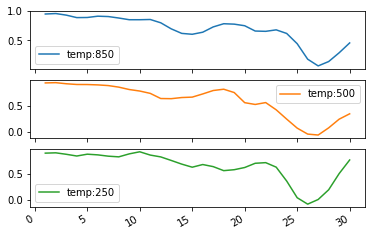

In [16]:
dTable['ACOREX07N_20141212002014121212T.scan'].loc[:,["temp:850", "temp:500", "temp:250"]].plot(subplots=True)

Veja a seguir o mesmo exemplo anterior, mas utilizando o método `iloc`:

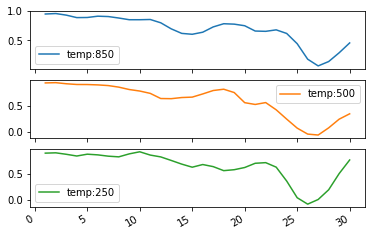

In [17]:
axes = dTable['ACOREX07N_20141212002014121212T.scan'].iloc[:,1:4].plot(subplots=True)

Outras opções de plotagem com o Matplotlib podem ser passadas também para a função `plot()`, veja a seguir:

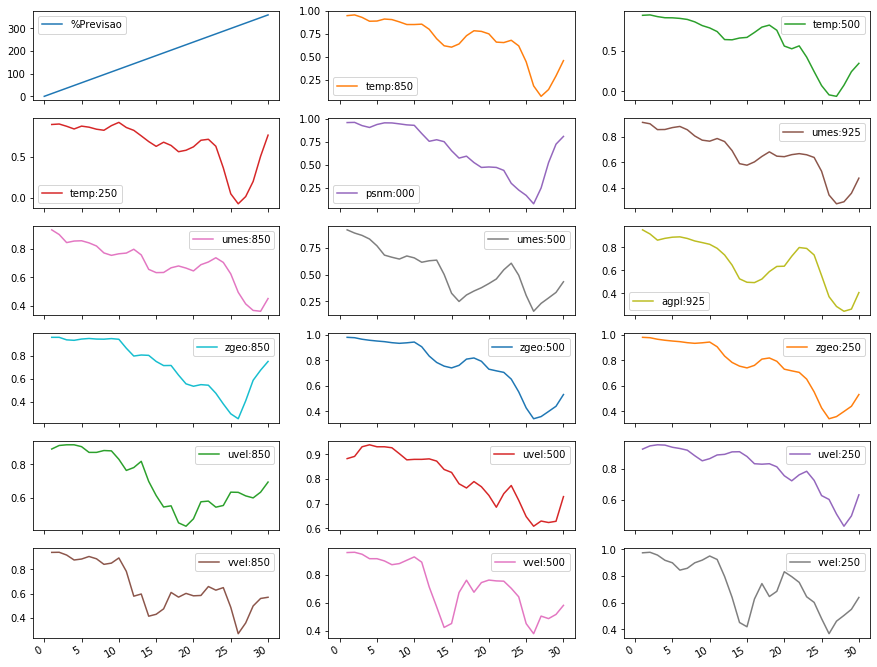

In [18]:
axes = dTable['ACOREX07N_20141212002014121212T.scan'].plot.line(subplots=True, figsize=(15,15), layout=(7,3), sharex=True)

Com mais do que um experimento, é possível também plotá-los no mesmo gráfico. Veja a seguir como plotar duas colunas de dois dataframes diferentes (ie., duas tabelas do SCANTEC), no mesmo gráfico:

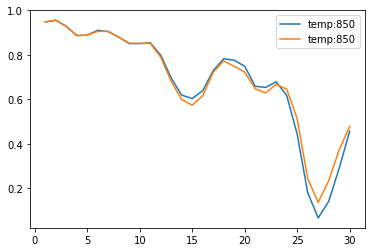

In [19]:
df_exp1 = dTable['ACOREX07N_20141212002014121212T.scan'].loc[:,["temp:850"]]
df_exp2 = dTable['ACOREX07P_20141212002014121212T.scan'].loc[:,["temp:850"]]
ax = df_exp1.plot()
df_exp2.plot(ax=ax)

## Funções de plotagem do SCANPLOT

As tabelas do SCANTEC como dataframes do Pandas, permitem o acesso às facilidades associados ao módulo. O SCANPLOT possui também algumas funções de plotagem que permitem a manipulação das tabelas em lotes. 

### plot_lines

A função `plot_lines` realiza a plotagem das tabelas selecionadas a partir da utilização da função `get_dataframe`. Para chamar a função `plot_lines`, utilize o comando a seguir:

In [20]:
from scanplot import plot_lines

Assim como foi feito anteriormente para as outras funções do SCANPLOT, a ajuda da função pode ser acessada com um dos comandos a seguir:

In [21]:
#help(plot_lines)
print(plot_lines.__doc__)


    plot_lines
    
    Esta função plota gráficos de linha a partir de um dicionário de dataframes com as tabelas do SCANTEC.
    
    Parâmetros de entrada
    ---------------------
        dTable  : objeto dicionário com uma ou mais tabelas do SCANTEC
        Vars    : lista com os nomes e níveis das variáveis
        Stats   : lista com os nomes das estatísticas a serem processadas
        outDir  : string com o diretório com as tabelas do SCANTEC
        combine : valor Booleano para combinar as curvas dos experimentos em um só gráfico
    
    Resultado
    ---------
        Figuras salvas no diretório definido na variável outDir (SCANTEC/dataout).
    
    Uso
    ---
        from scanplot import read_namelists, get_dataframe, plot_lines
        
        data_vars, data_conf = read_namelists("~/SCANTEC")
        
        dataInicial = data_conf["Starting Time"]
        dataFinal = data_conf["Ending Time"]
        Vars = list(map(data_vars.get,[*data_vars.keys()]))
        Stats

Veja que a função `plot_lines` recebe como parâmetros de entrada o dicionário `dTable`, as listas `Vars` e `Stats` e o diretório de saída `outDir` que será utilizado para salvar as figuras produzidas. Veja a seguir como utilizar a função `plot_lines`:

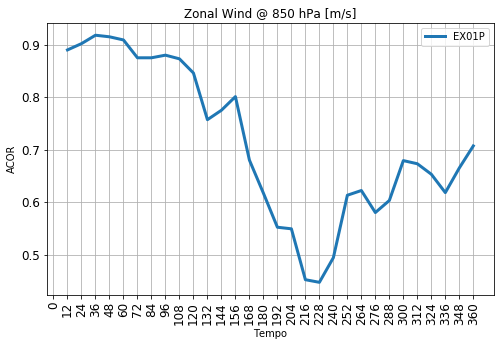

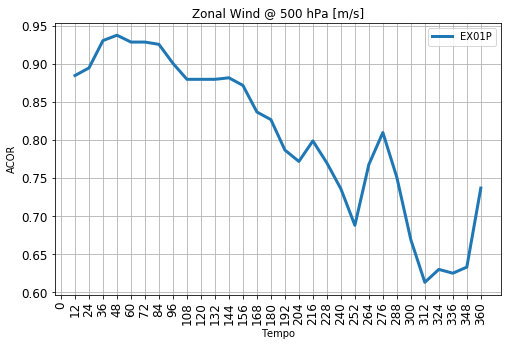

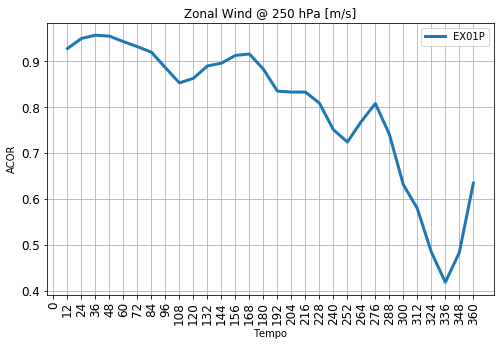

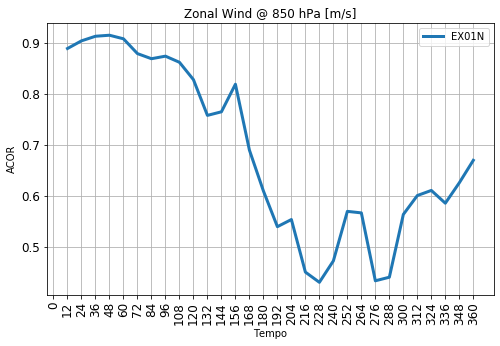

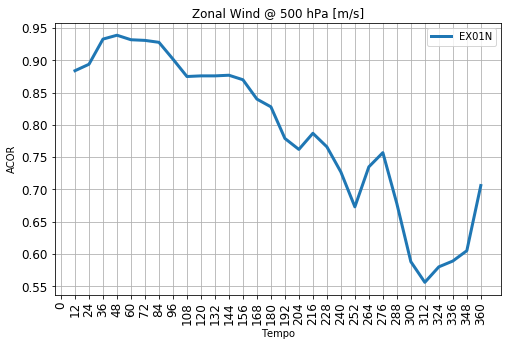

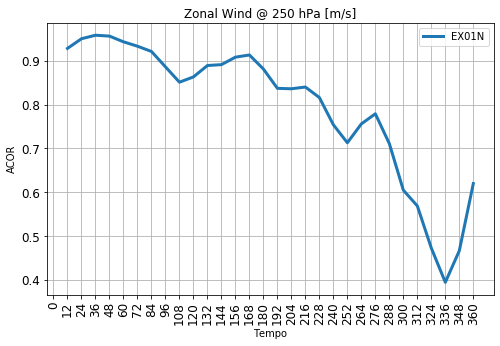

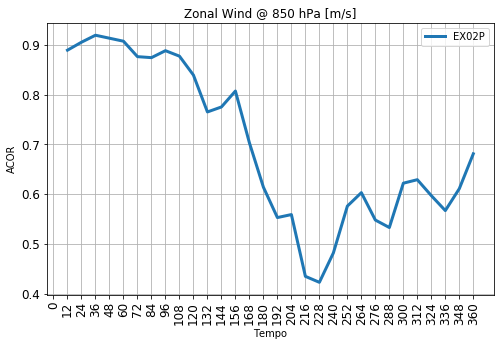

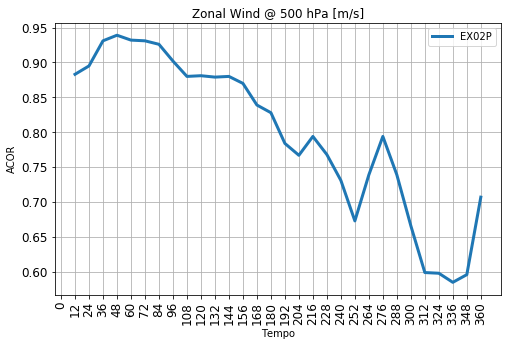

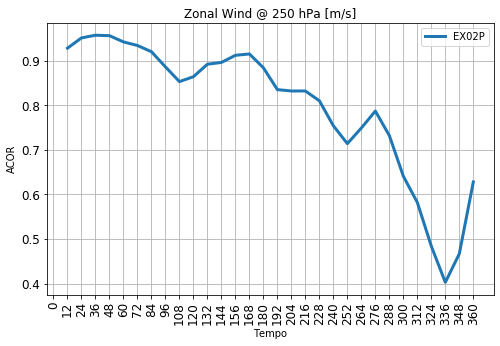

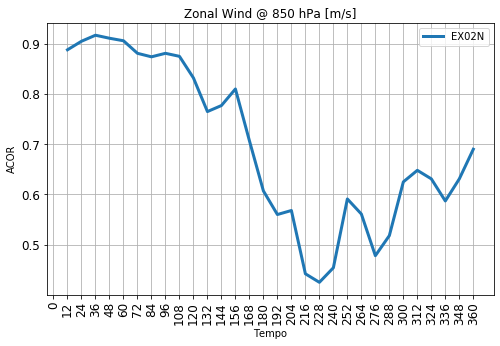

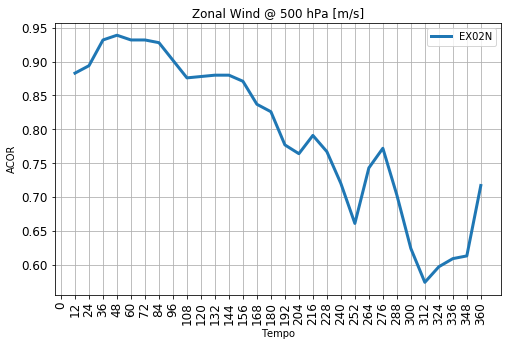

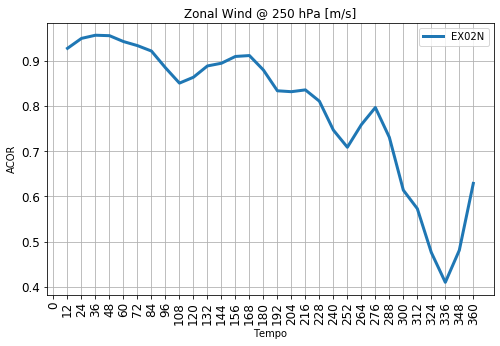

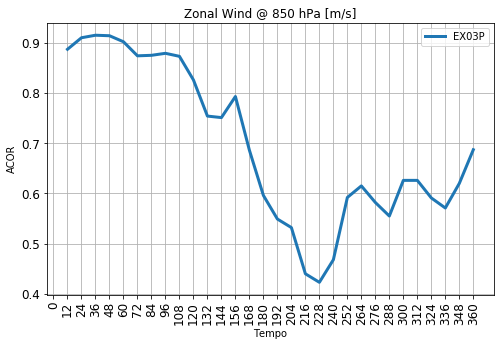

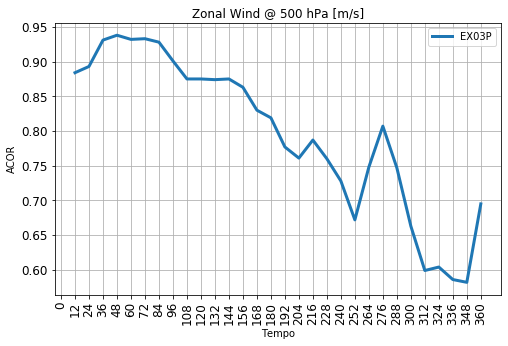

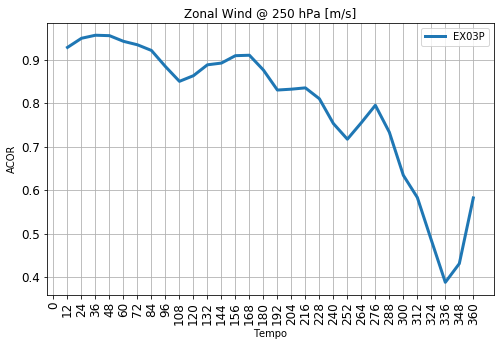

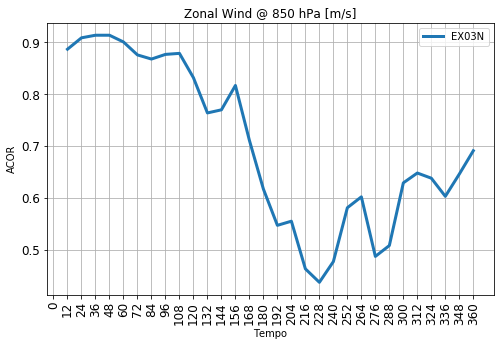

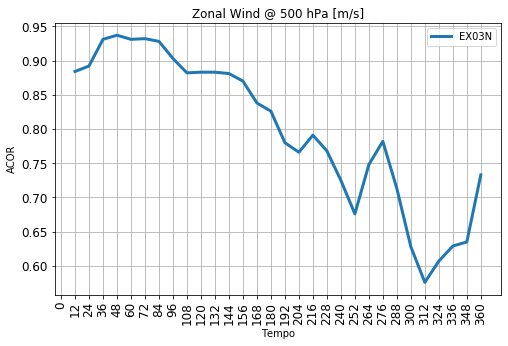

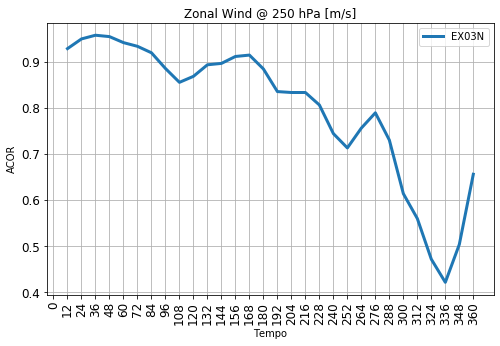

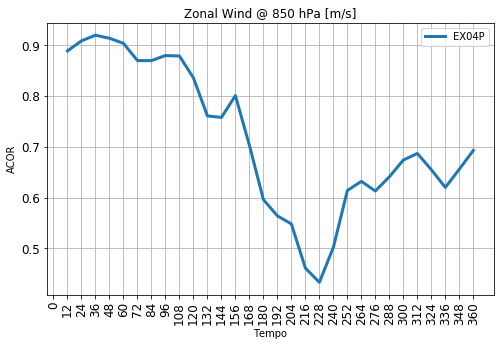

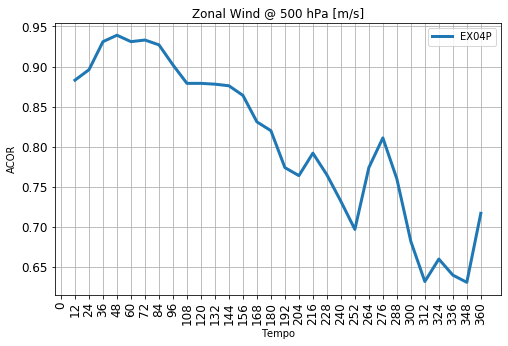

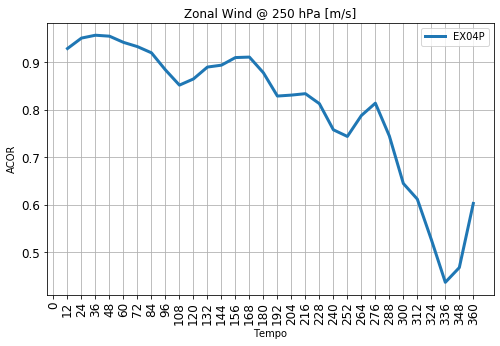

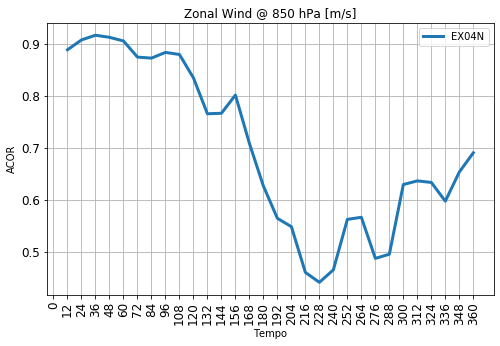

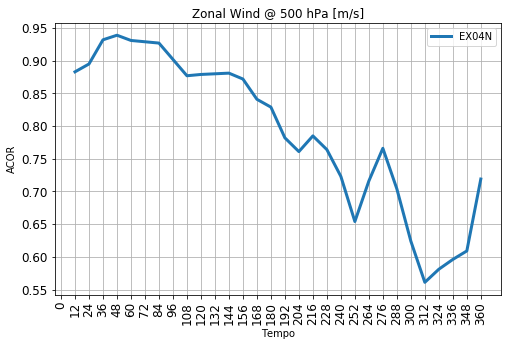

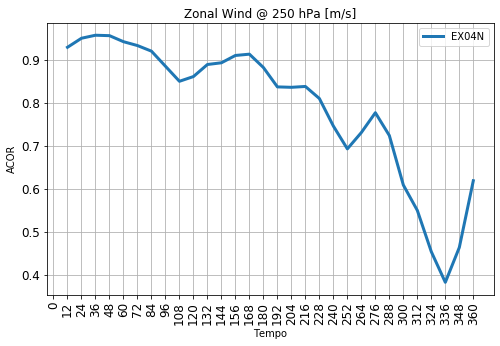

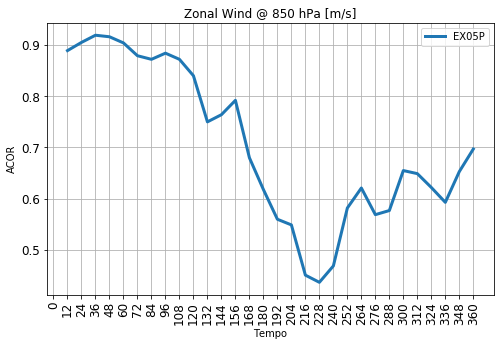

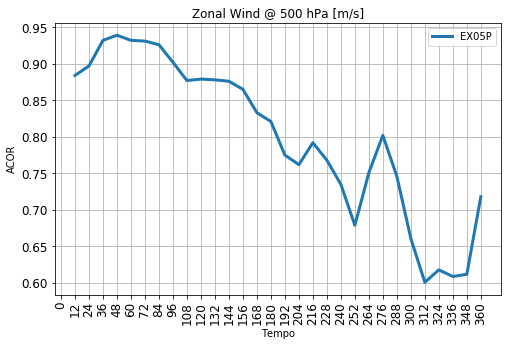

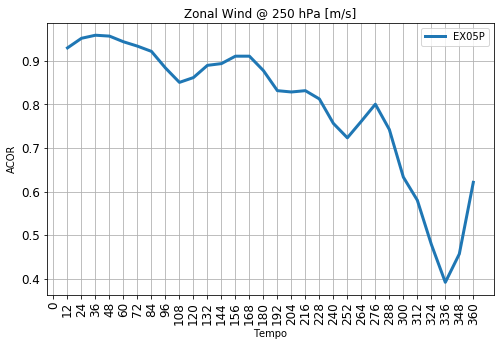

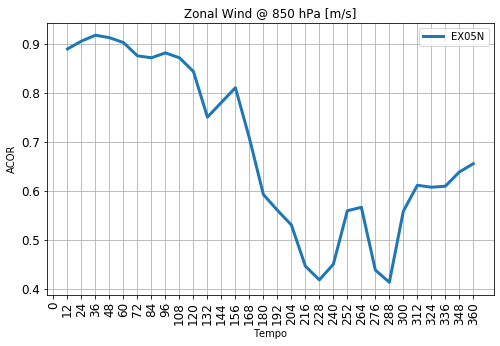

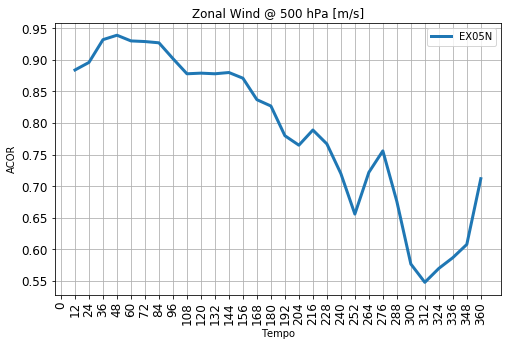

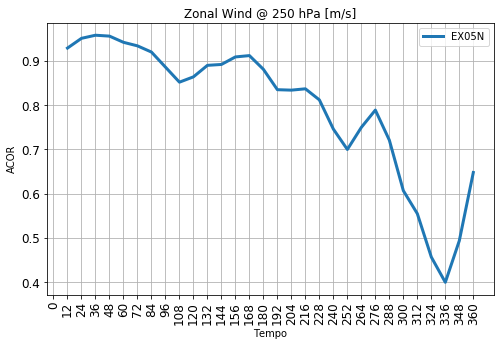

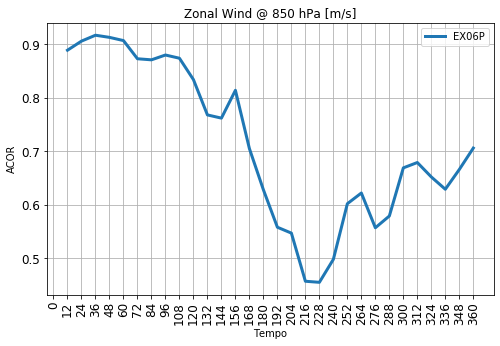

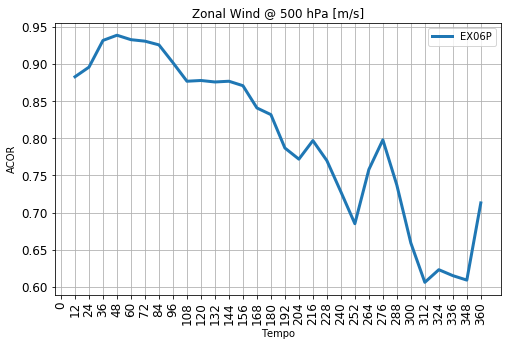

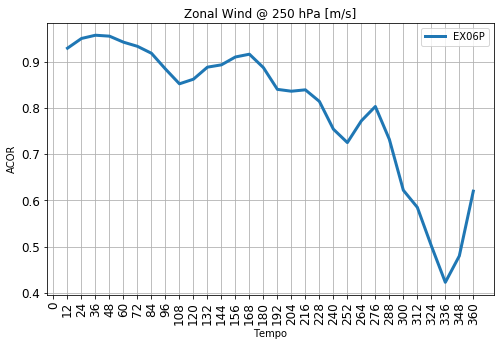

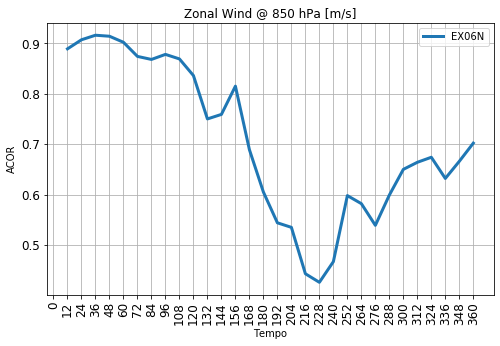

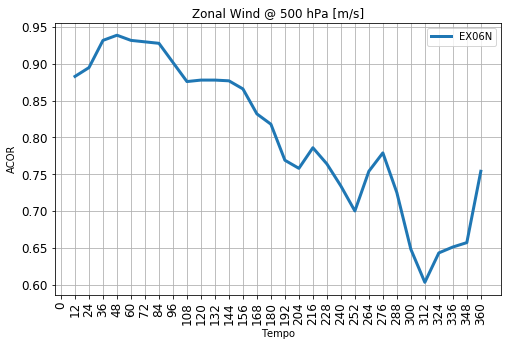

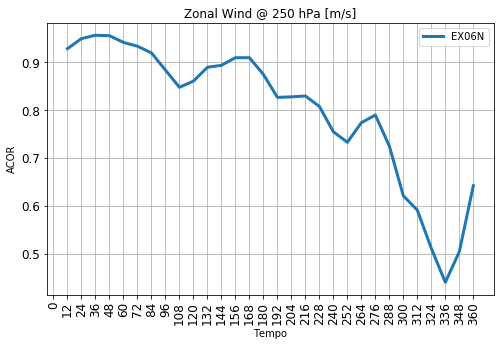

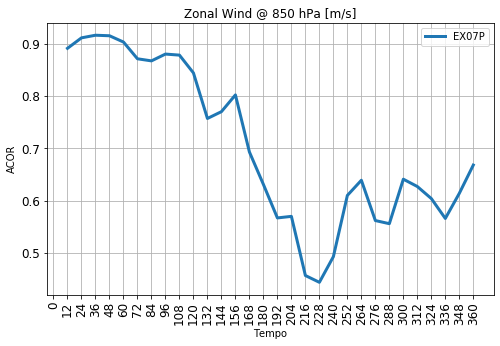

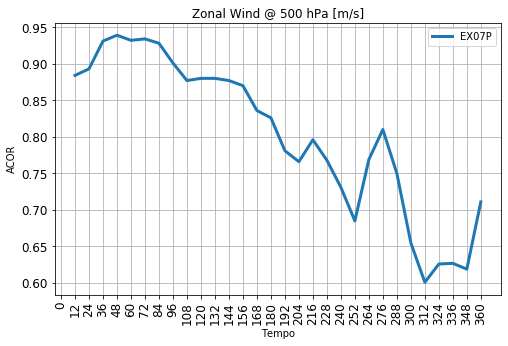

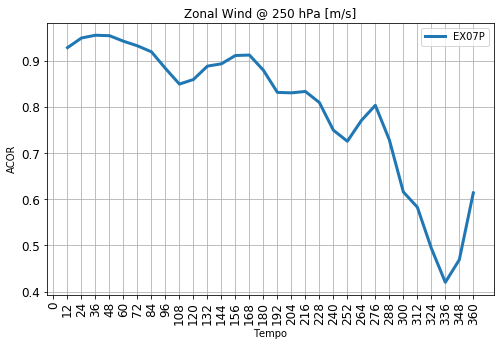

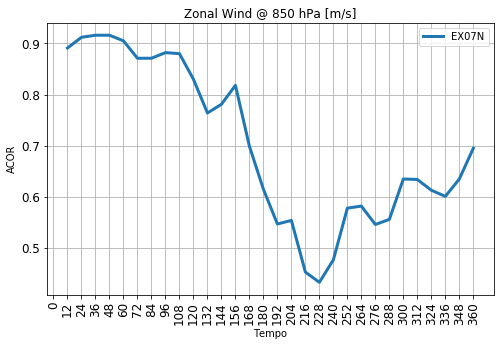

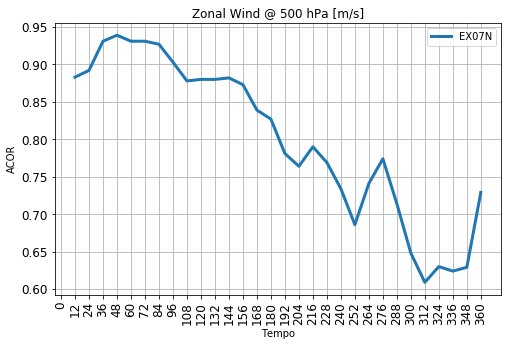

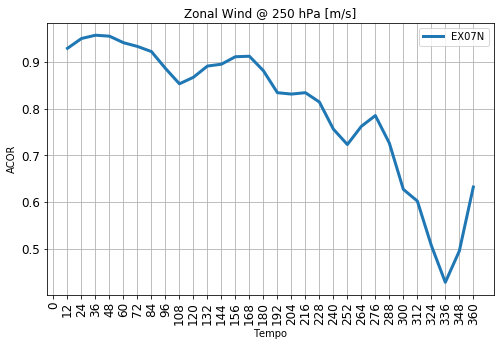

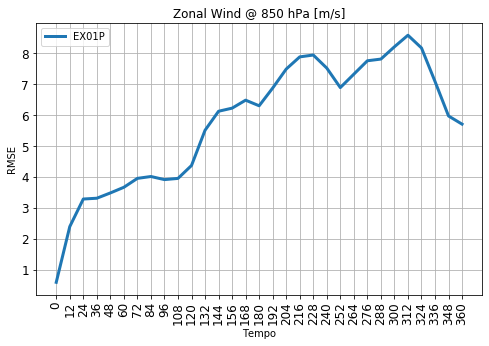

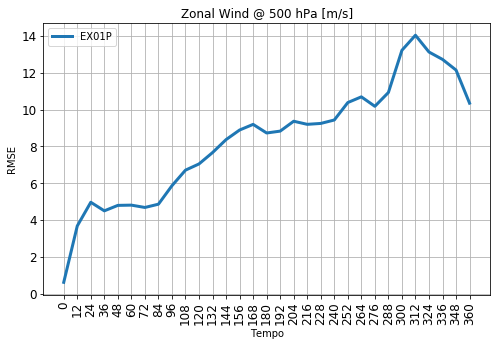

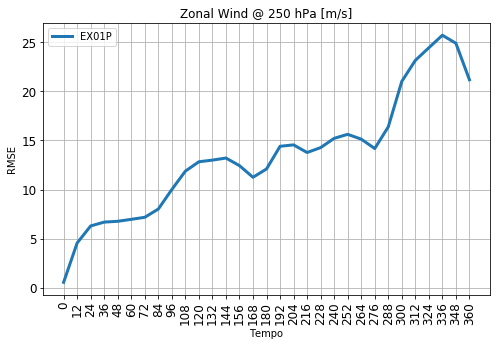

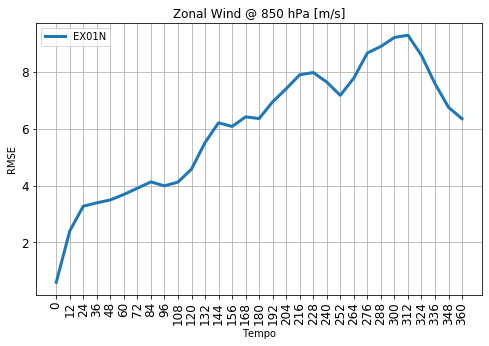

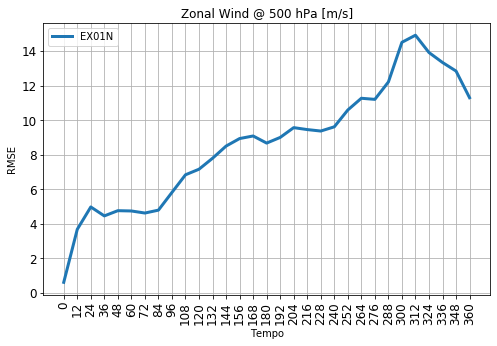

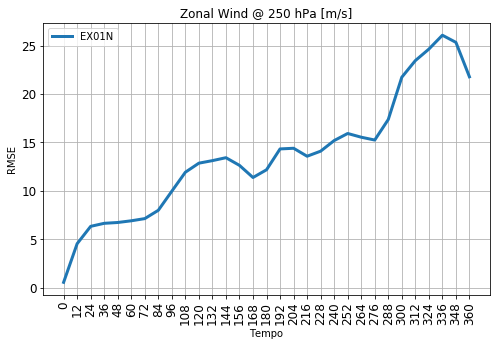

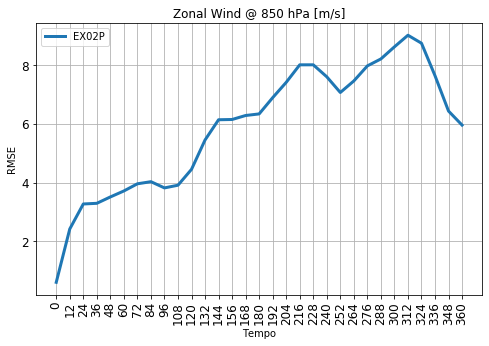

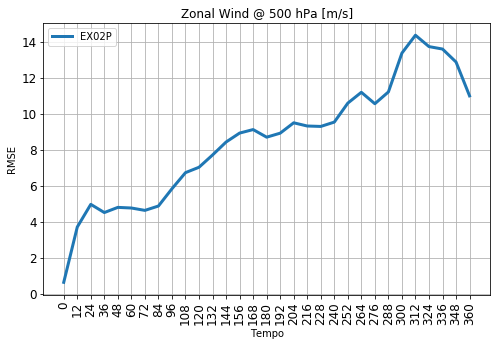

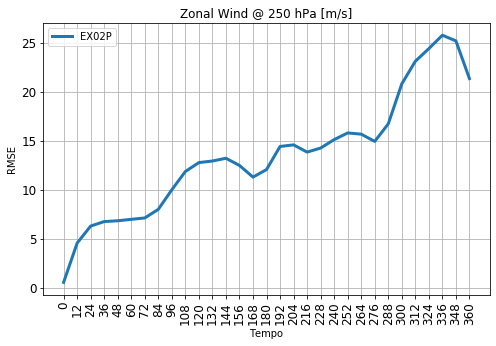

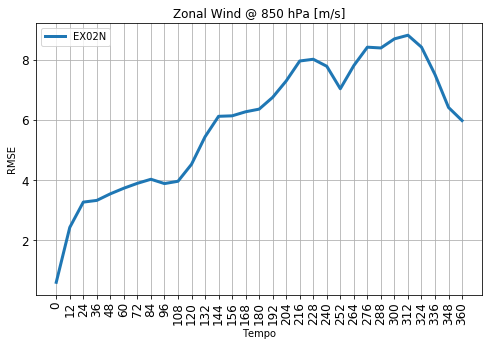

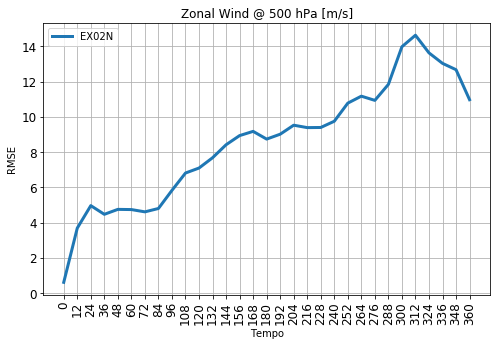

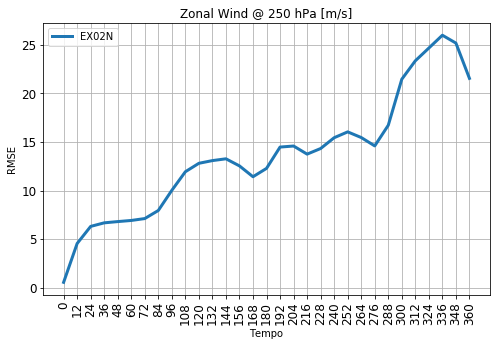

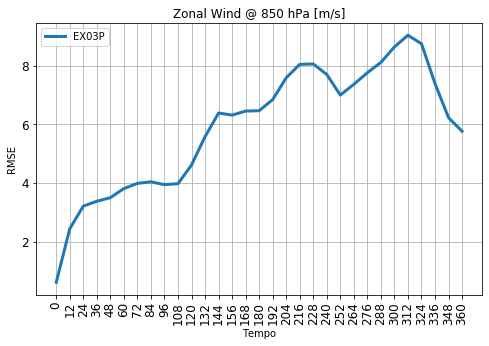

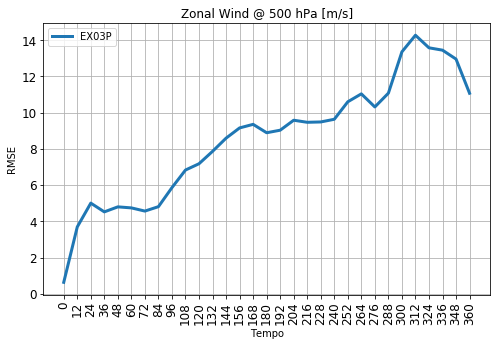

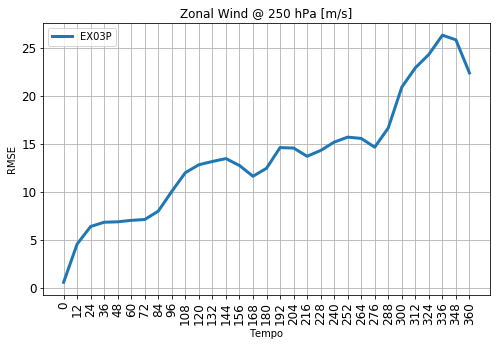

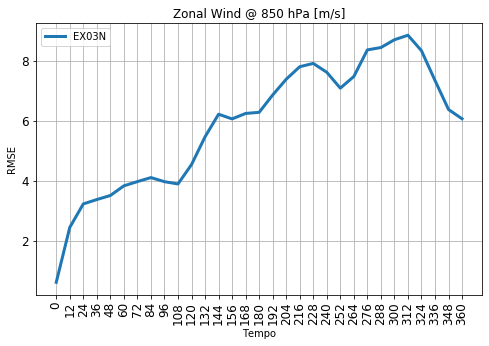

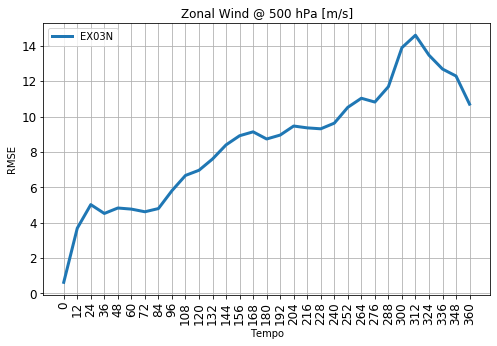

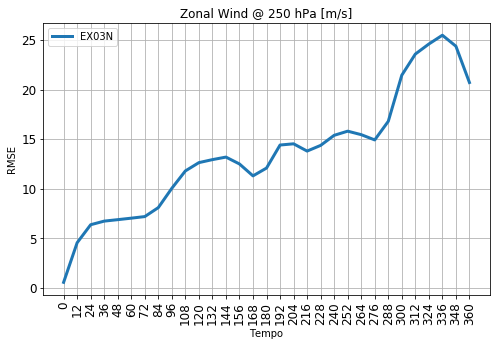

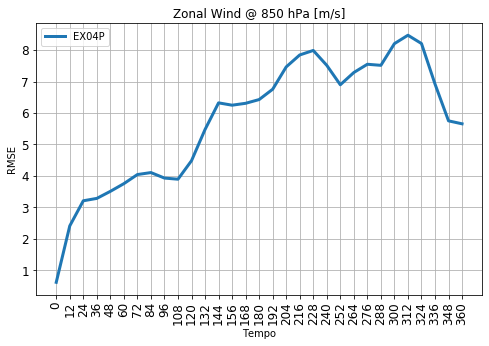

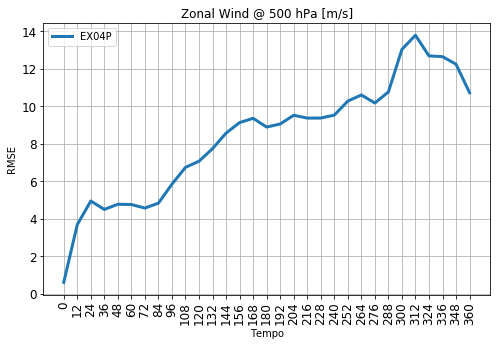

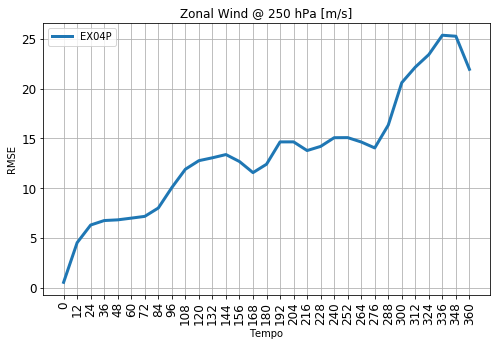

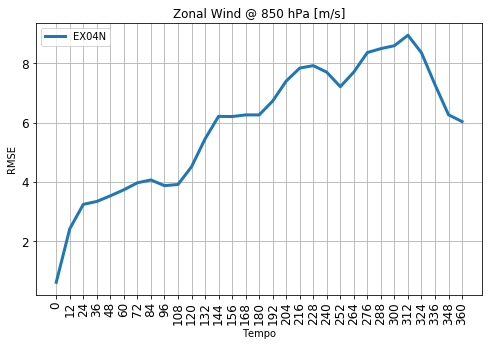

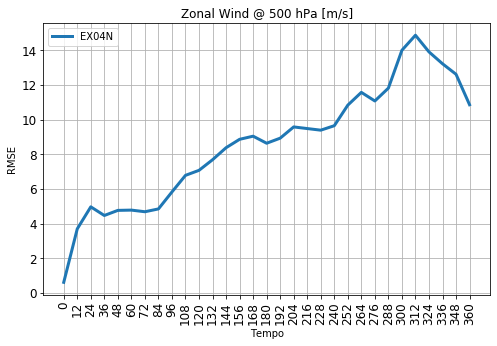

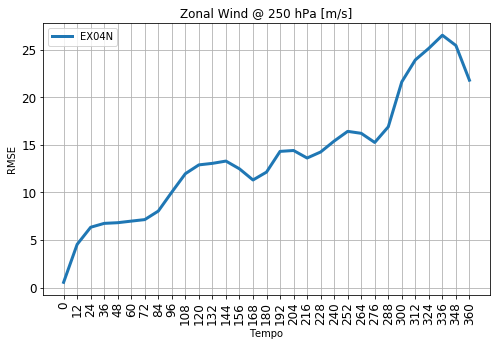

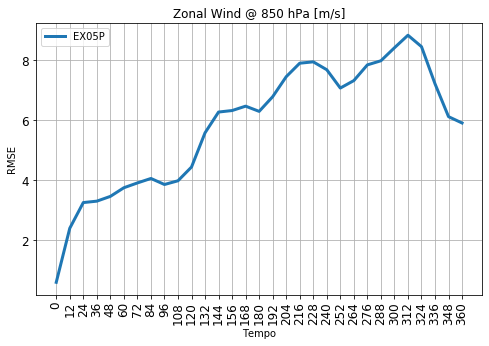

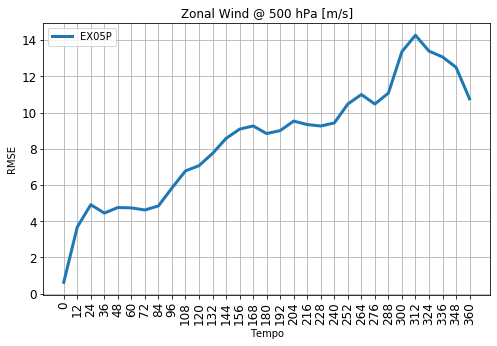

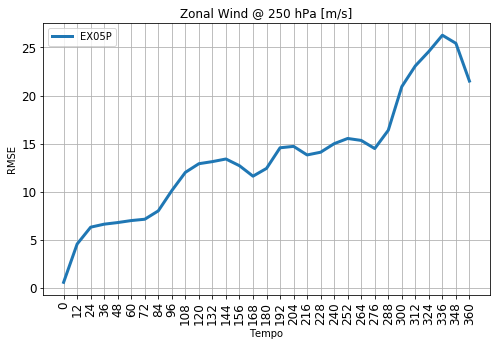

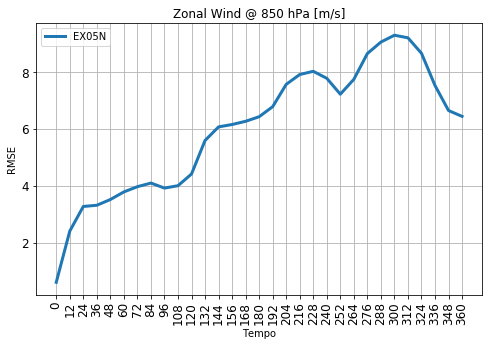

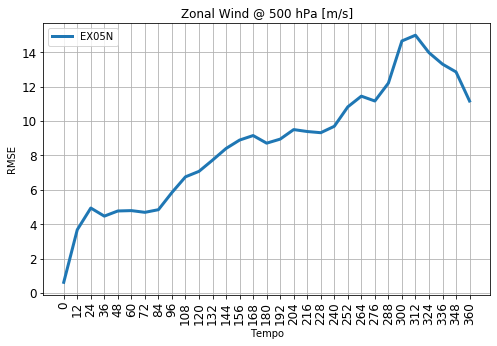

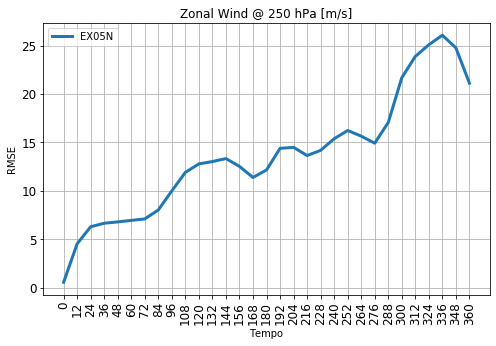

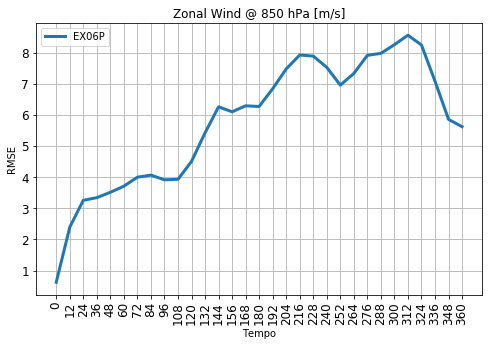

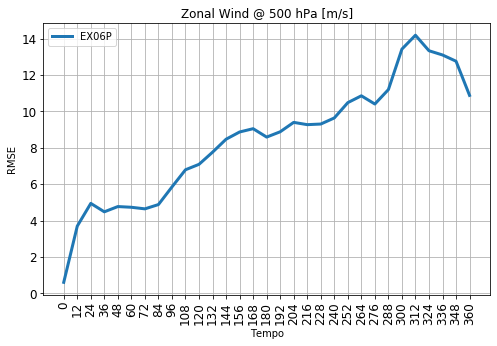

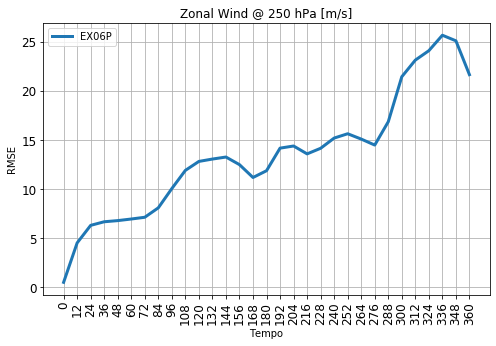

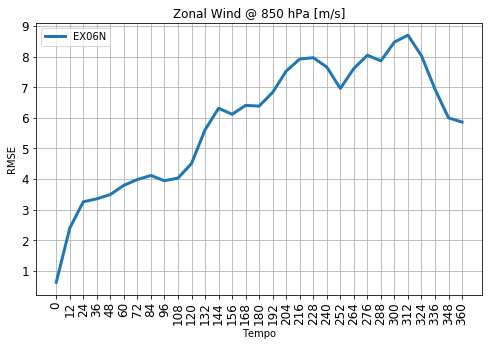

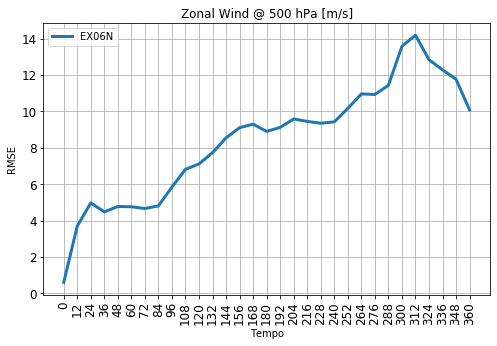

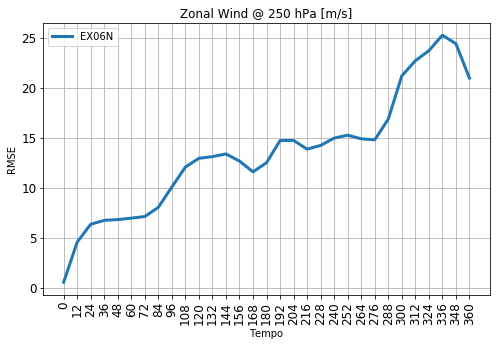

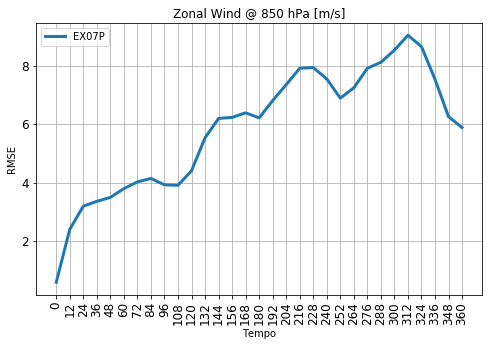

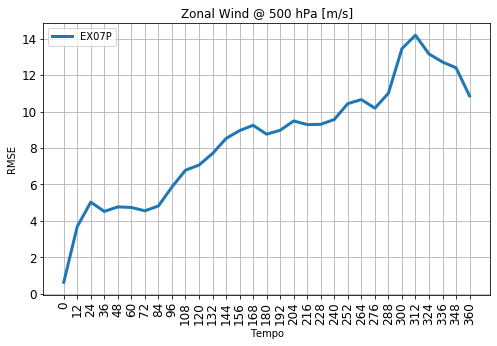

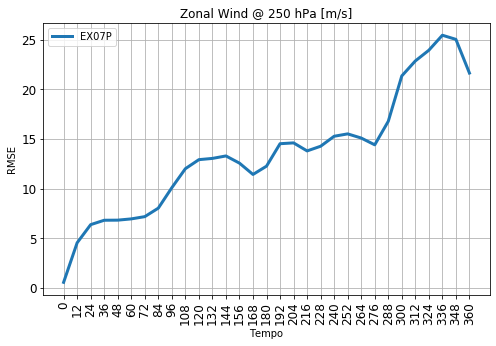

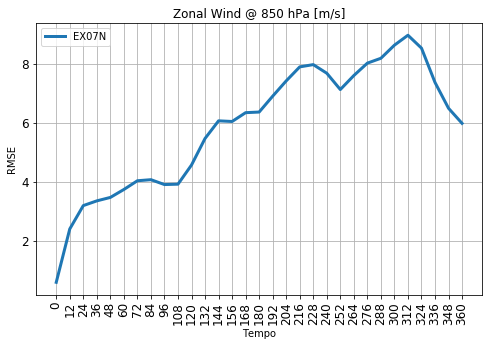

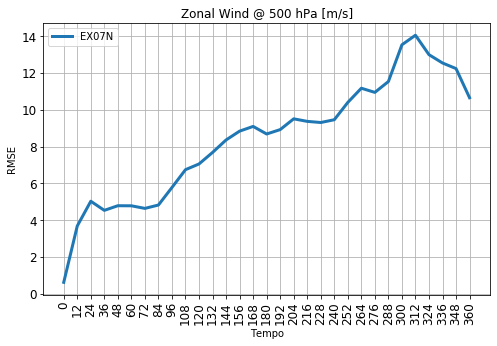

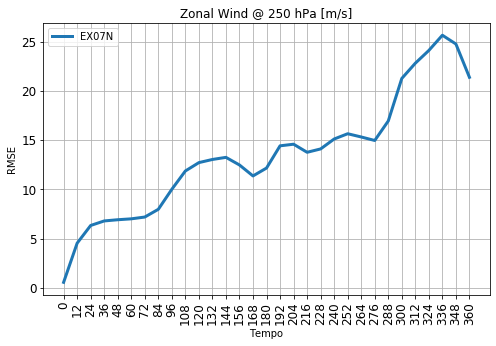

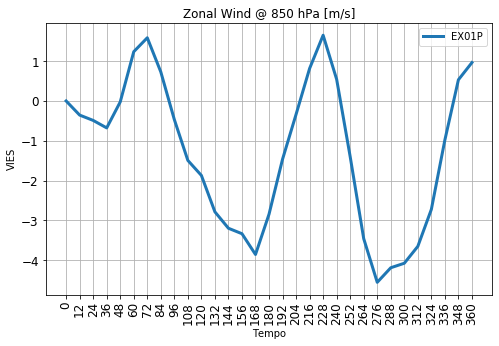

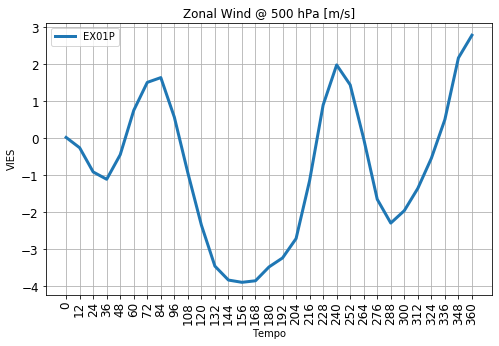

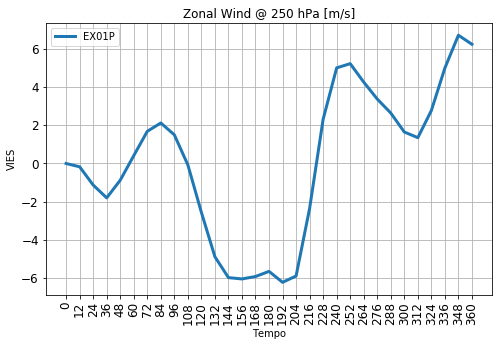

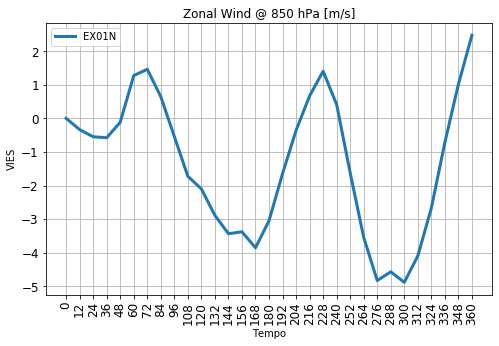

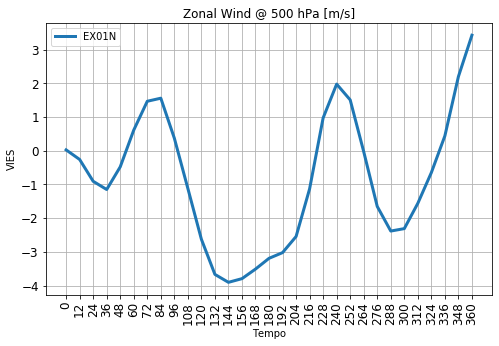

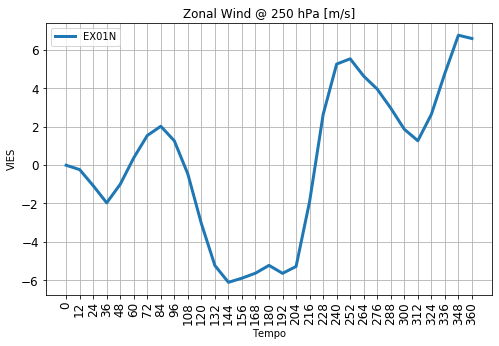

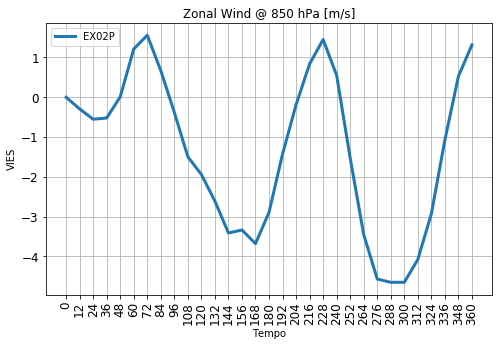

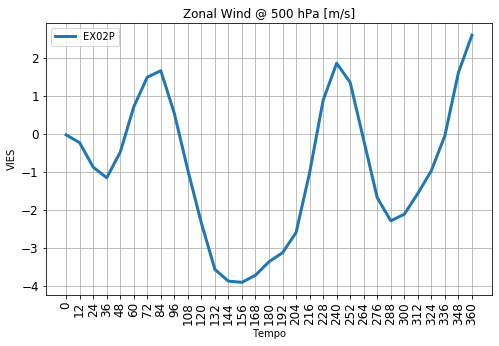

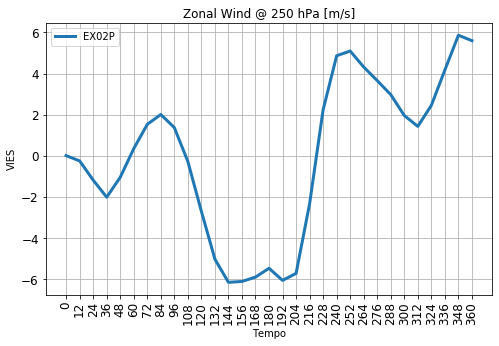

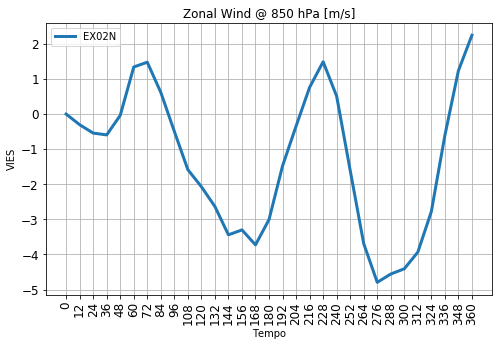

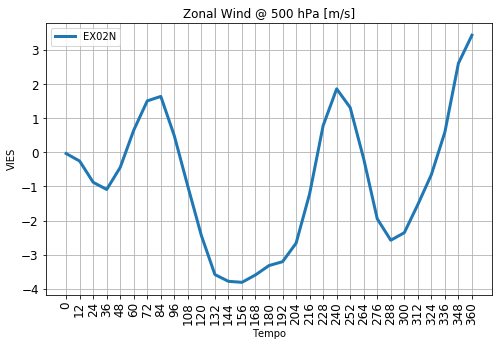

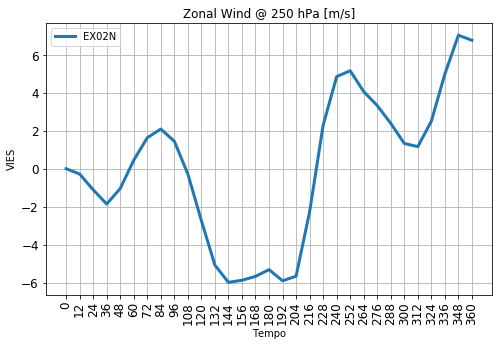

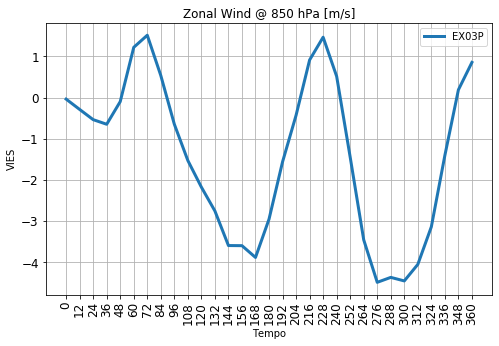

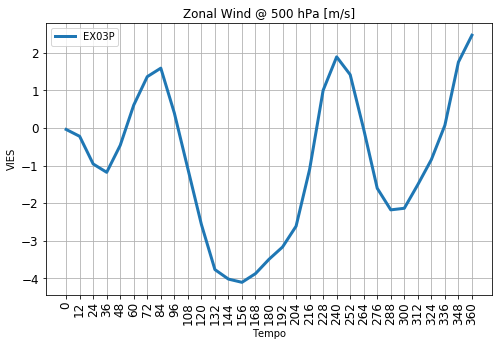

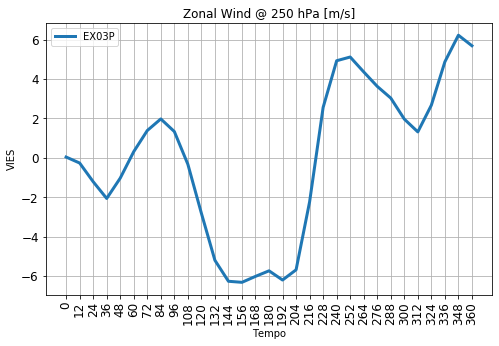

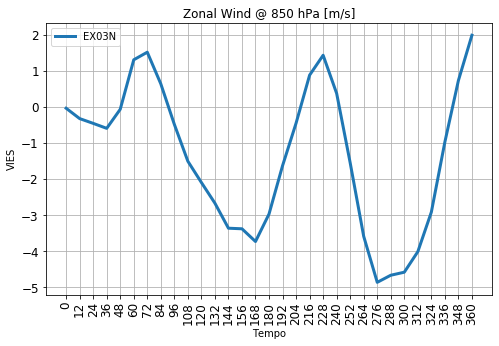

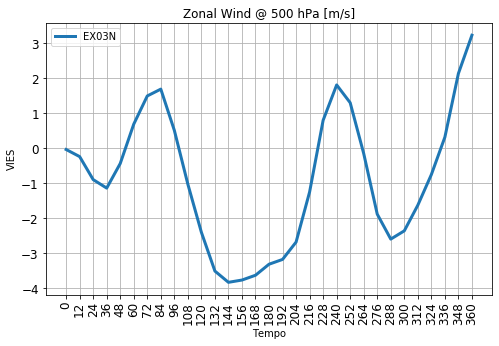

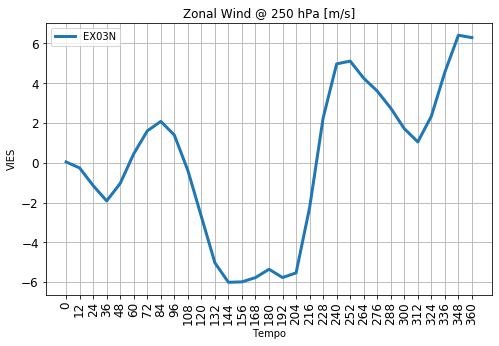

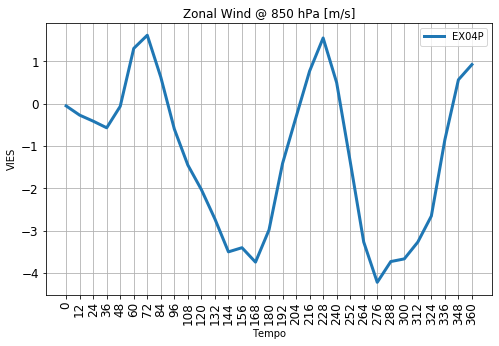

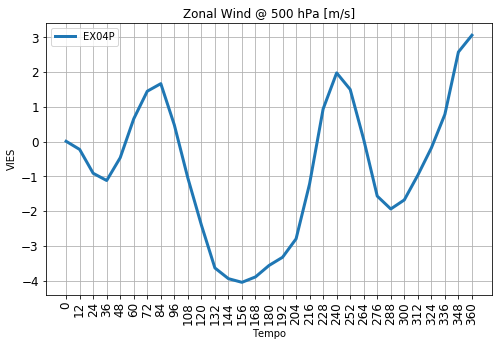

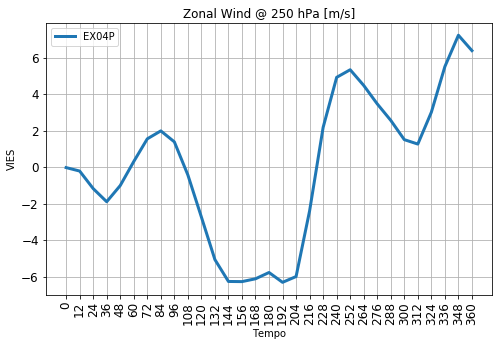

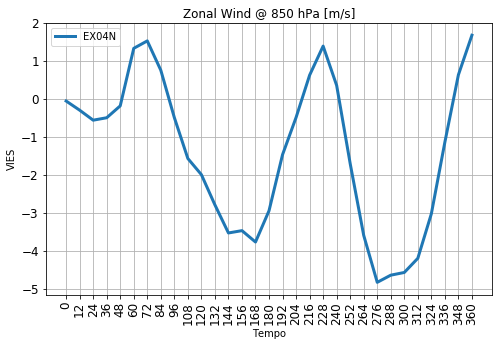

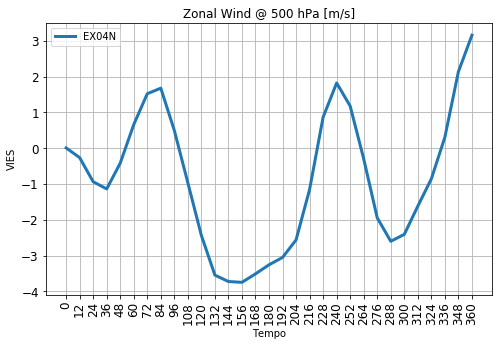

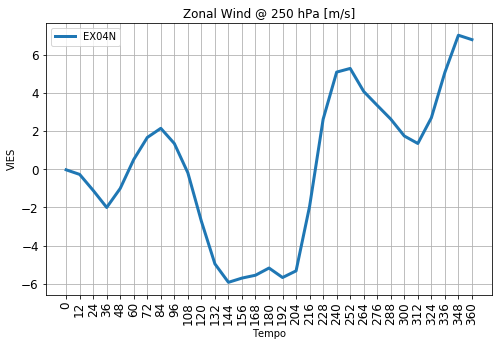

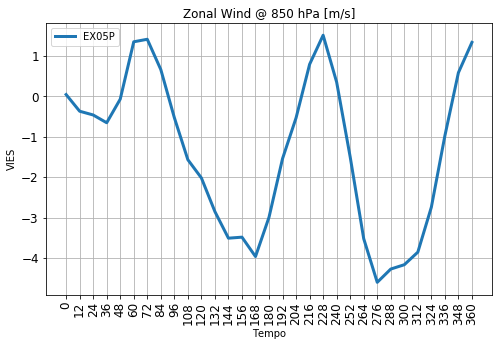

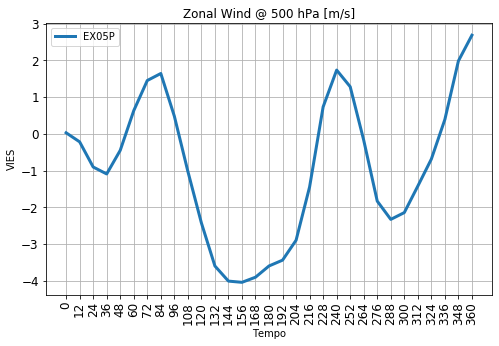

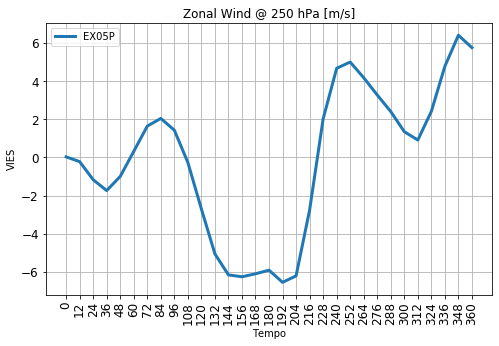

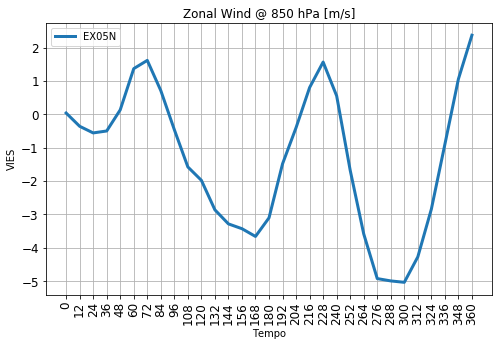

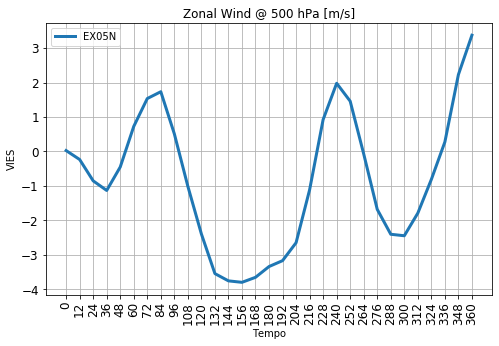

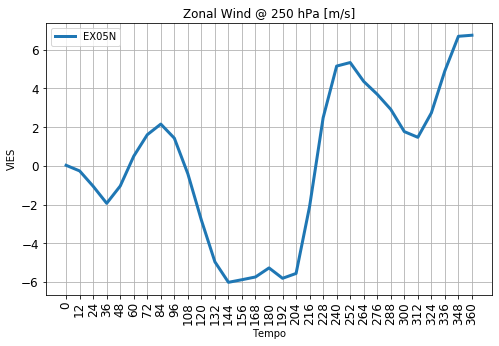

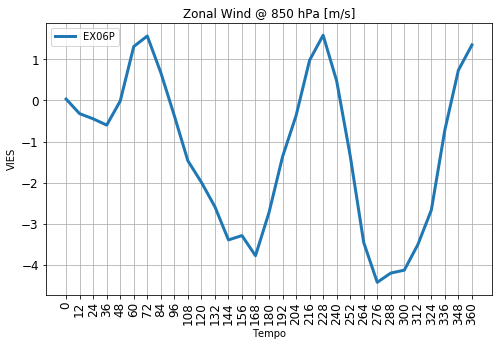

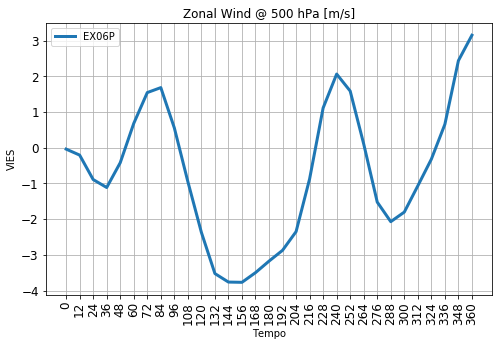

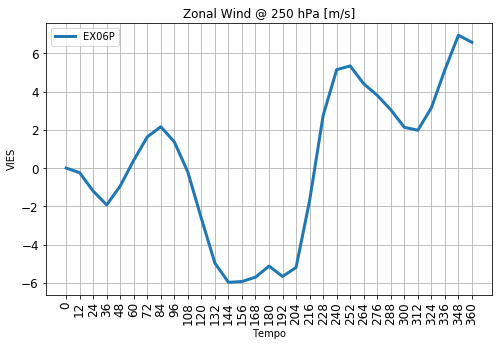

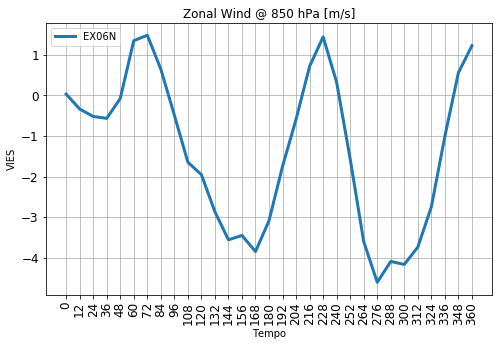

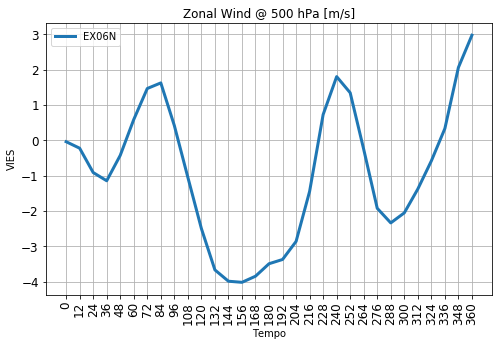

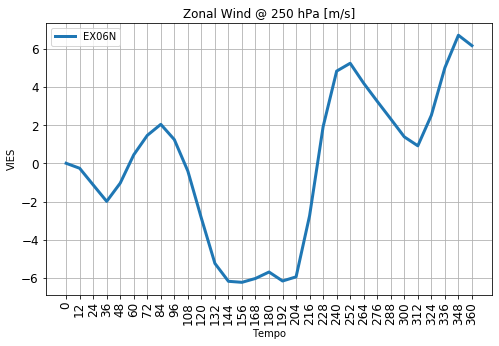

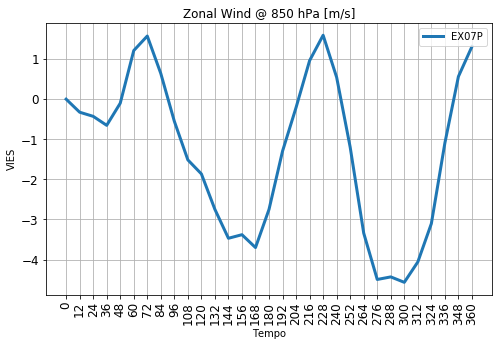

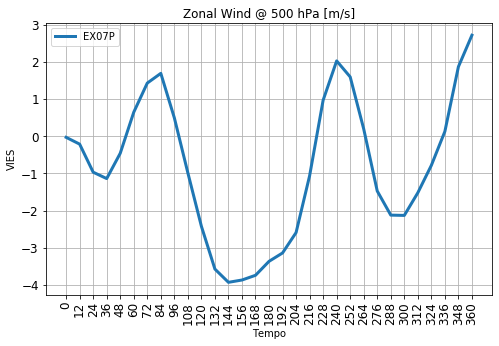

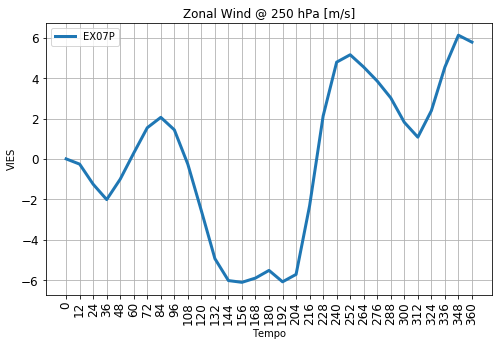

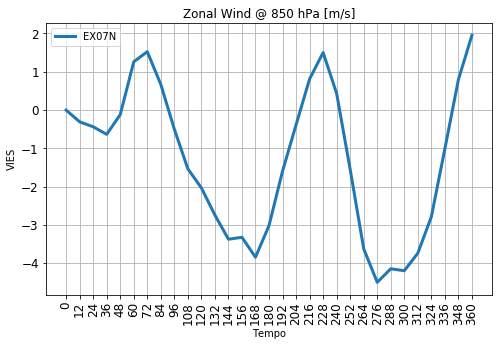

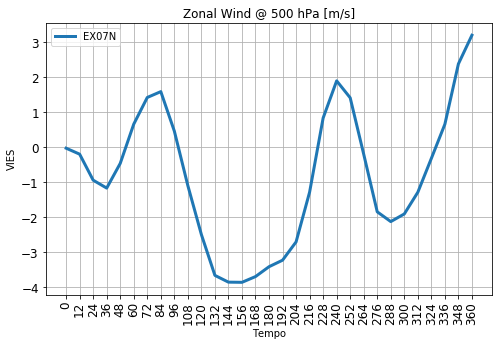

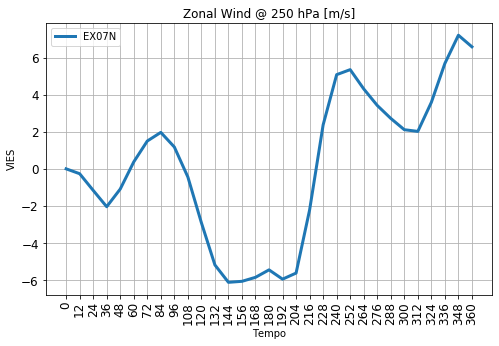

In [22]:
plot_lines(dTable,Vars,Stats,outDir,combine=False)

Na função `plot_lines`, o parâmetro `combine=True` permite que as curvas dos experimentos sejam combinadas de acordo com a lista de variáveis `Vars` e estatísticas `Stats`. Veja o exemplo a seguir:

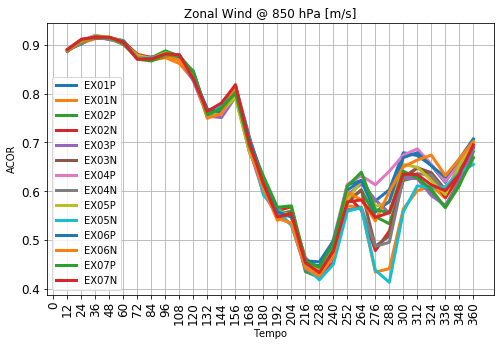

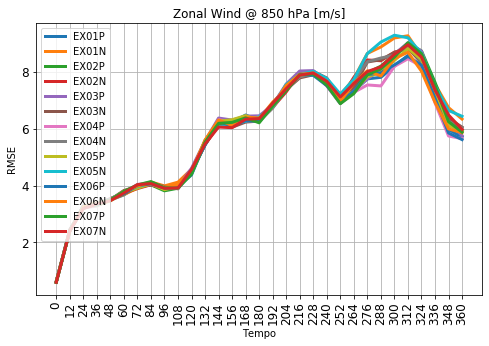

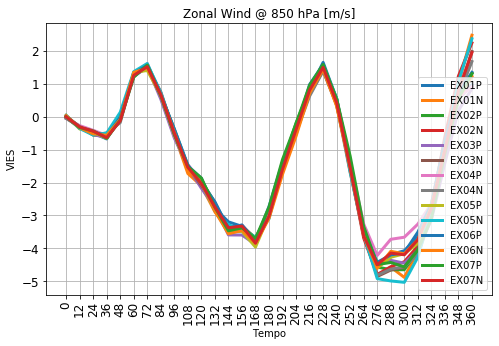

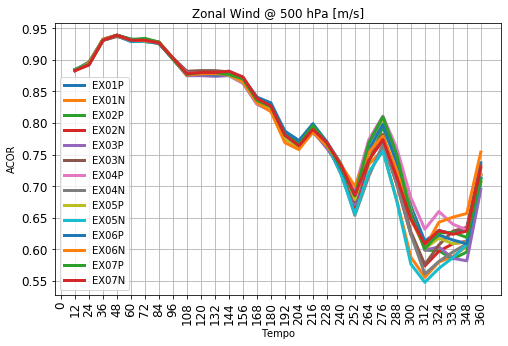

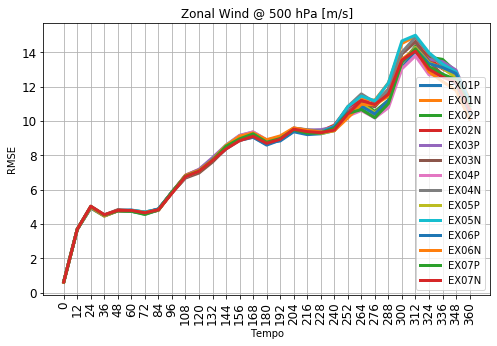

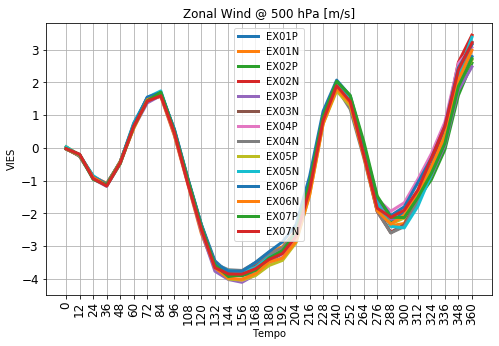

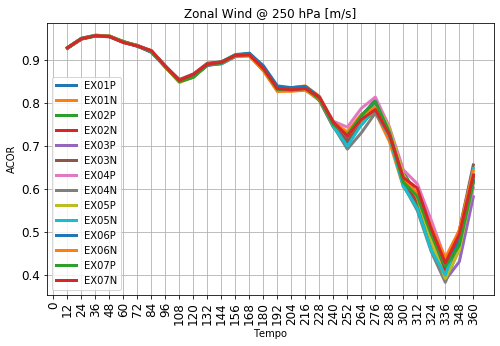

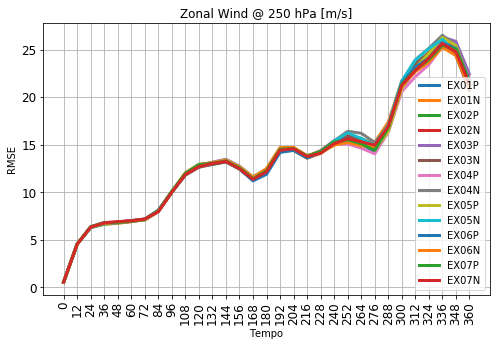

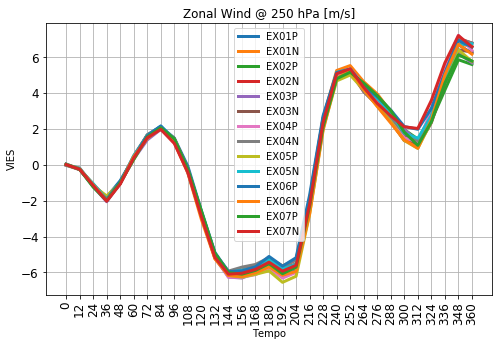

In [23]:
plot_lines(dTable,Vars,Stats,outDir,combine=True)

### plot_scorecard

Outra função interessante do SCANPLOT é a `plot_scorecard`. Nesta função podem ser calculadas duas métricas que permitem quantificar a variação relativa entre dois experimentos avaliados pelo SCANTEC. As métricas aplicadas são o "Ganho Percentual*" e a "Mudança Fracional" e ambas podem ser calculadas com base nas tabelas de estatisticas do SCANTEC. Estas métricas podem ser utilizadas quando se quiser ter uma visão imadiata sobre as melhorias obtidas entre duas versões de um modelo ou entre dois experimentos de um mesmo modelo.

O Ganho Percentual é definido por:

$$Ganho_{STAT} = \frac{EXP2_{STAT} - EXP1_{STAT}}{EXP_{perfeito} - EXP1_{STAT}} \times 100$$

onde,

* $EXP1$: tabelas do experimento 1;
* $EXP2$: tabelas do experimento 2;
* $STAT$: pode ser o VIES, RMSE ou ACOR;
* $EXP_{perfeito}$: valor considerado quando o experimento é perfeito, ie., 0 quando VIES ou RMSE e 1 quando ACOR.

A Mudança Fracional é definida por:

$$MF_{STAT} = 1 - \frac{EXP2_{STAT}}{EXP1_{STAT}}$$

onde,

* $EXP1$: tabelas do experimento 1;
* $EXP2$: tabelas do experimento 2;
* $STAT$: pode ser o VIES, RMSE ou ACOR;

---
*[BAÑOS, I. H.](http://lattes.cnpq.br/6820161737155390); et al. **Impacto da Assimilação de Perfis de Refratividade do  Satélite Metop-B nas Previsões de Tempo do CPTEC/INPE Durante os Meses de Janeiro e Agosto de 2014.** Disponível em [link](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-77862018000100065).

Para aprender a utilizar a função `plot_scorecard`, importe a função e em seguida, digite um dos comandos a seguir:

In [24]:
from scanplot import plot_scorecard

In [25]:
print(plot_scorecard.__doc__)
#help(plot_scorecard)


    plot_scorecard
    
    Esta função calcula o "Ganho Percentual*" e a "Mudança Fracional*" a partir 
    das estatísticas do SCANTEC e plota os resultados na forma de um scorecard. 
    São necessários dois experimentos.
    
    *Banos et al., 2018: Impacto da Assimilação de Perfis de Refratividade do 
                         Satélite Metop-B nas Previsões de Tempo do CPTEC/INPE 
                         Durante os Meses de Janeiro e Agosto de 2014.
    
    Parâmetros de entrada
    ---------------------
        dTable  : objeto dicionário com uma ou mais tabelas do SCANTEC
        Vars    : lista com os nomes e níveis das variáveis
        Stats   : lista com os nomes das estatísticas a serem processadas
        Tstat   : tipo de score a ser calculado
        outDir  : string com o diretório com as tabelas do SCANTEC
    
    Resultado
    ---------
        Figuras salvas no diretório definido na variável outDir (SCANTEC/dataout).
    
    Uso
    ---
        from scanplot imp

Como o scorecard tem a premissa de remusir as estatísticas calculadas indicando para quais variáveis e quando ele é melhor ou pior do que o outro experimento, é interessante considerarmos todas as variáveis contidas nas tabelas (pode-se escolher qualquer quantidade ou estatísticas). Para isso, incrementamos a lista `Vars` com os índices das variáveis que serão utilizadas:

In [26]:
Vars = list(map(data_vars.get,[*data_vars.keys()]))

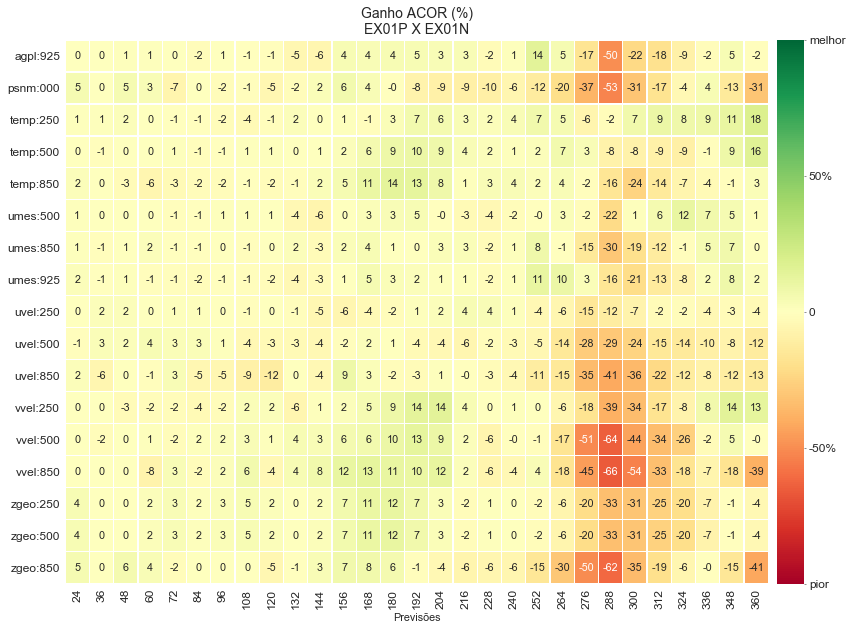

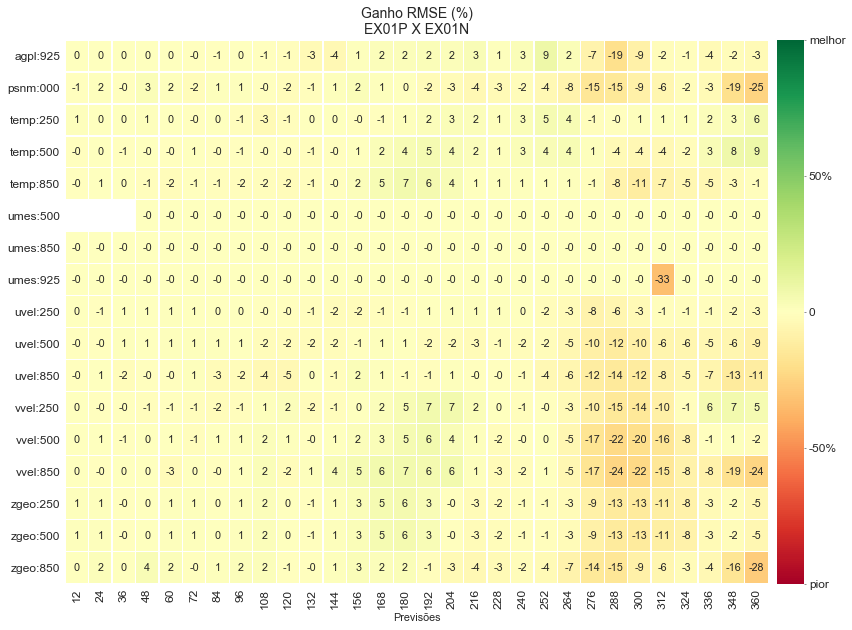

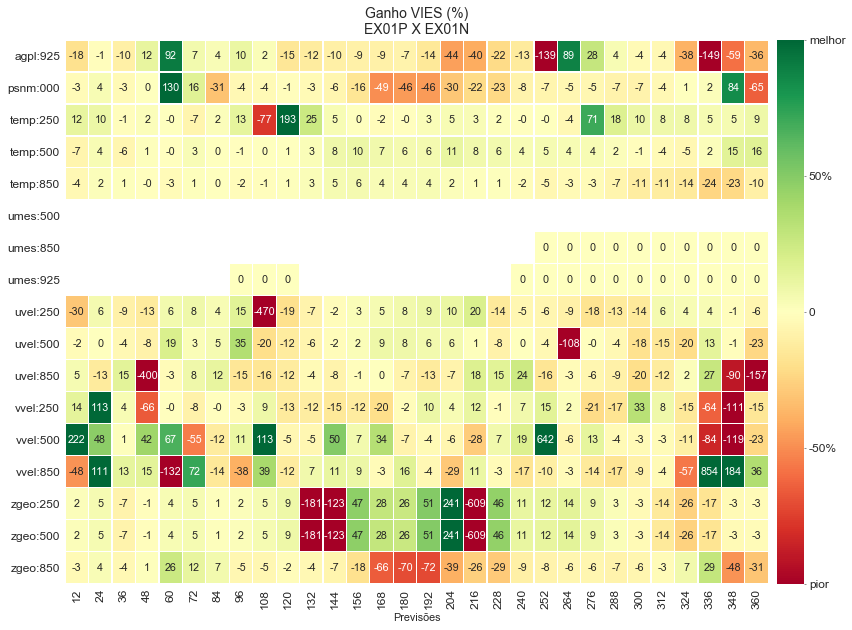

In [27]:
plot_scorecard(dTable,Vars,Stats,'ganho',outDir)

Como indicado pela documentação, a função `plot_scorecard` está preparada para plotar os scorecards a partir do ganho percentual (indicado pelo parâmetro `ganho` passado para dentro da função) e a partir do mudança fracional (indicado pelo parâmetro `fc` passado para dentro da função). Veja no exemplo a seguir os scorecards da mudança fracional obtidos a partir das tabelas do SCANTEC, indicadas pelo parâmetro `Stats`:

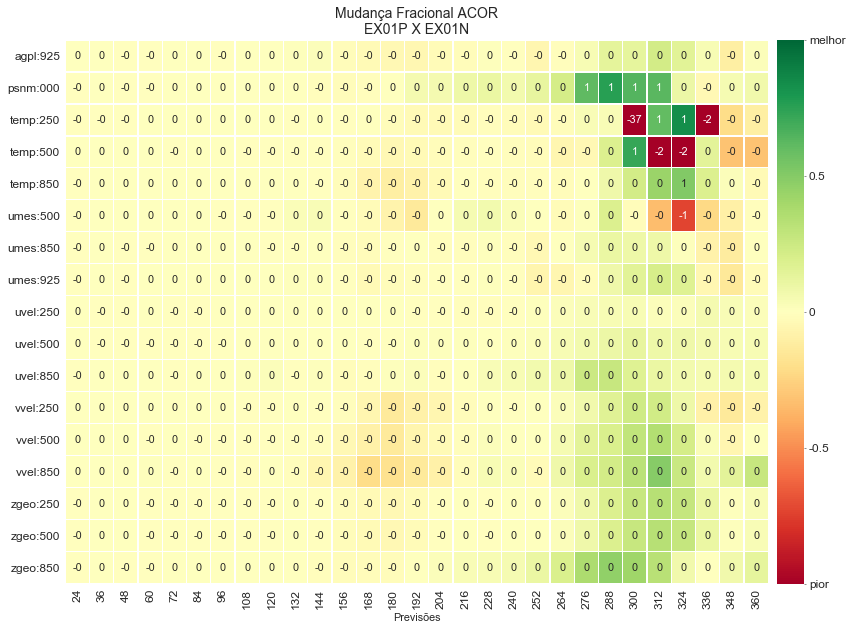

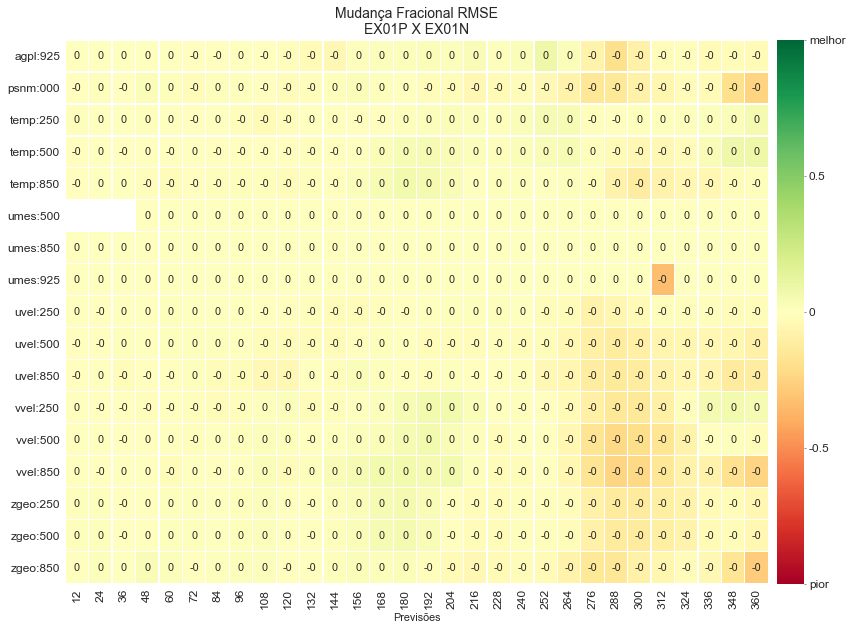

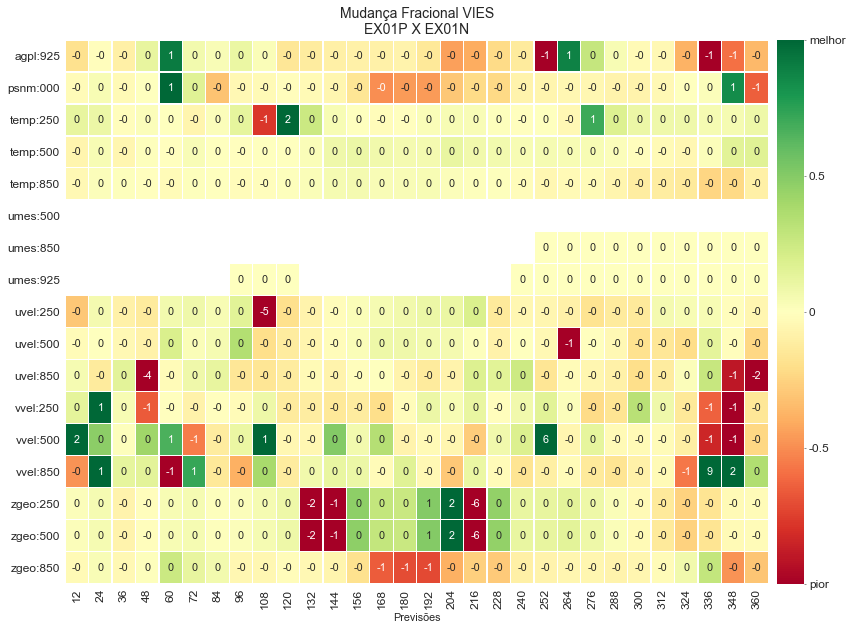

In [28]:
plot_scorecard(dTable,Vars,Stats,'fc',outDir)

### plot_dTaylor

O diagrama de Taylor, semelhante ao scorecard, também possui a característica de resumir estatísticas básicas em um único diagrama. A função `plot_dTaylor` utiliza o módulo `SkillMetrics` (veja mais detalhes sobre este módulo em [SkillMetrics](https://pypi.org/project/SkillMetrics/)) para plotar o diagrama de Taylor a partir das tabelas do SCANTEC.

Para utilizar a função `plot_dTaylor`, basta carregá-la a partir do módulo `scanplot`:

In [29]:
from scanplot import plot_dTaylor

A documentação da função pode ser obtida com um dos comandos a seguir:

In [30]:
print(plot_dTaylor.__doc__)
#help(plot_dTaylor)


    plot_dTaylor
    
    Esta função plota o diagrama de Taylor a partir das tabelas de estatísticas
    do SCANTEC, para um ou mais experimentos.
    
    Esta função utiliza o módulo SkillMetrics (https://pypi.org/project/SkillMetrics/). 
    
    Parâmetros de entrada
    ---------------------
        dTable    : objeto dicionário com uma ou mais tabelas do SCANTEC
        Vars      : lista com os nomes e níveis das variáveis
        data_conf : objeto dicionário com as configurações do SCANTEC
        Stats     : lista com os nomes das estatísticas a serem processadas
                    (são necessárias as tabelas ACOR, RMSE e VIES)
        outDir    : string com o diretório com as tabelas do SCANTEC
    
    Resultado
    ---------
        Figuras salvas no diretório definido na variável outDir (SCANTEC/dataout).
    
    Uso
    ---
        from scanplot import read_namelists, get_dataframe, plot_dTaylor
        
        data_vars, data_conf = read_namelists("~/SCANTEC")
     

A função `plot_dTaylor` permite que sejam selecionadas uma ou mais variáveis, as quais serão plotadas em diagramas separados. O mesmo acontece com os experimentos. Para ilustrar o uso da função `plot_dTaylor`, serão escolhidas duas variáveis dos experimentos avalidados pelo SCANTEC.

In [31]:
Vars = list(map(data_vars.get,[12,13]))

Observe o parâmetros `data_conf`, que é o dicionário criado e que contém as configurações do SCANTEC, inclusive os  prefixos (eg., `EXP01`, `EXP02` etc) dos experimentos:

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


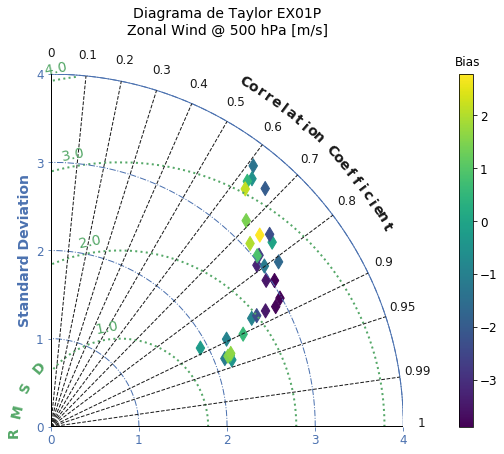

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


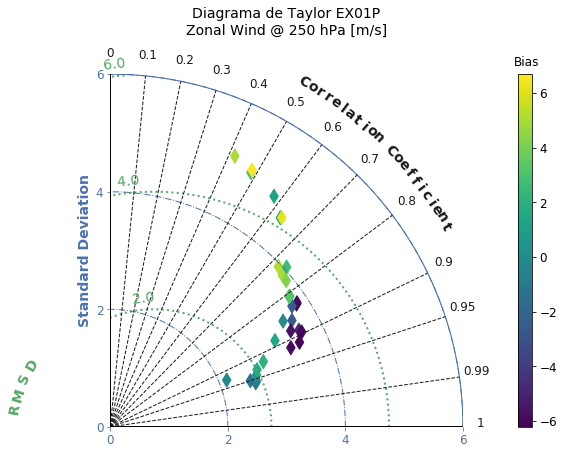

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


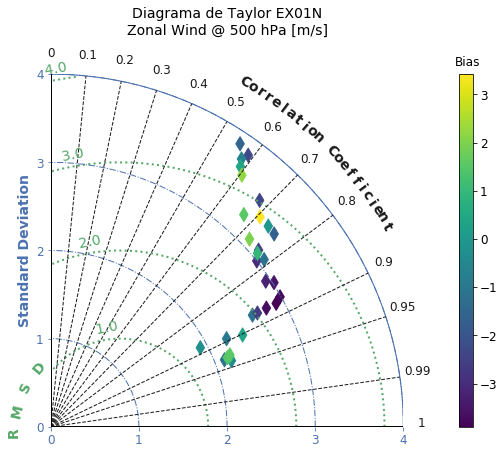

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


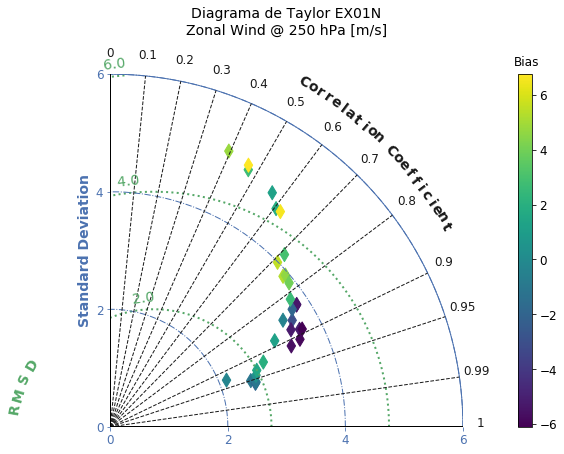

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


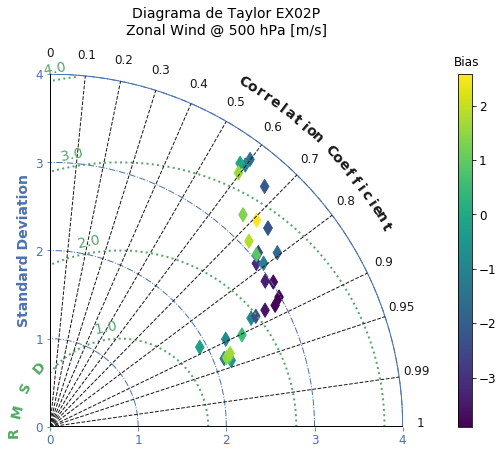

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


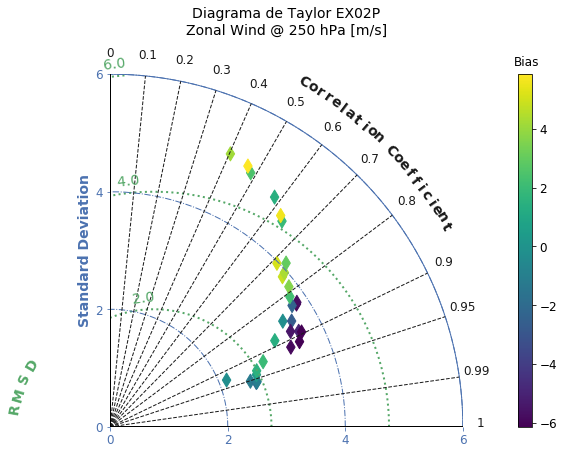

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


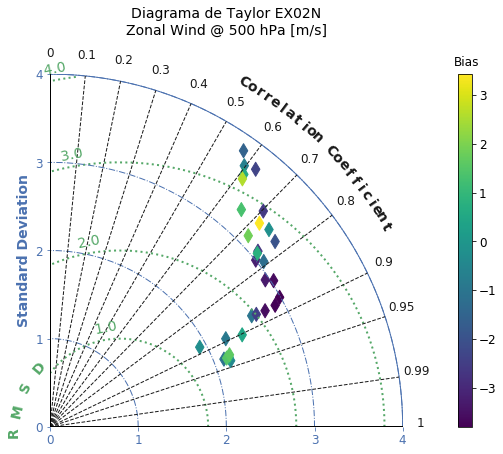

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


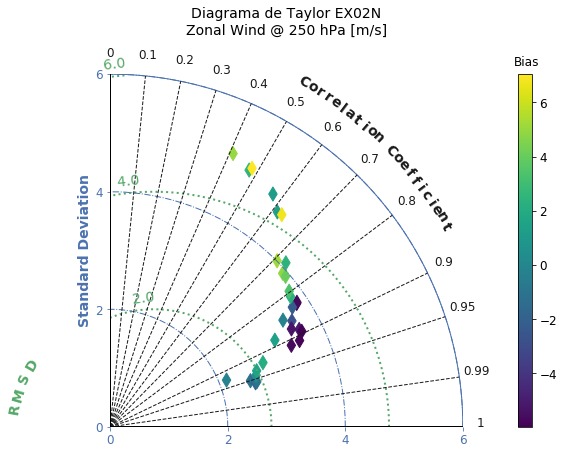

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


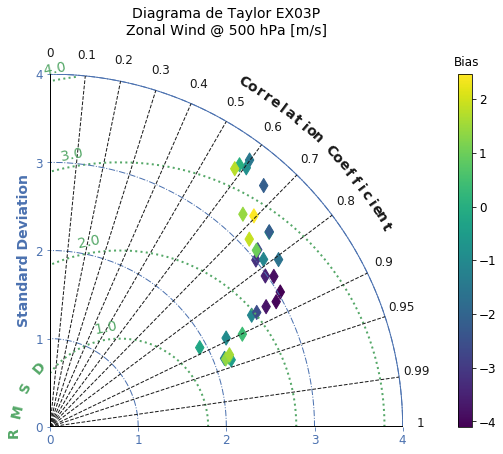

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


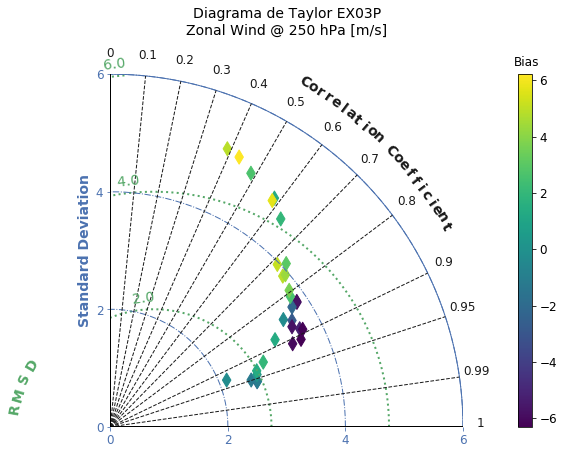

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


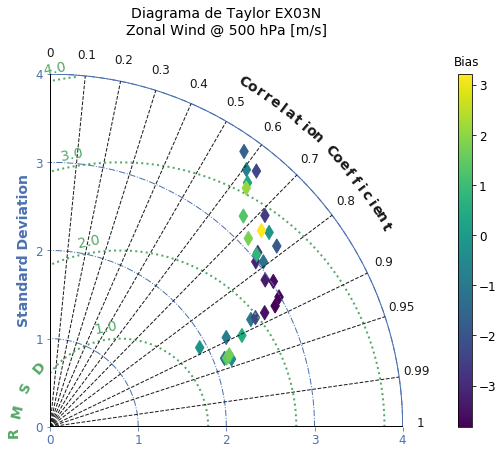

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


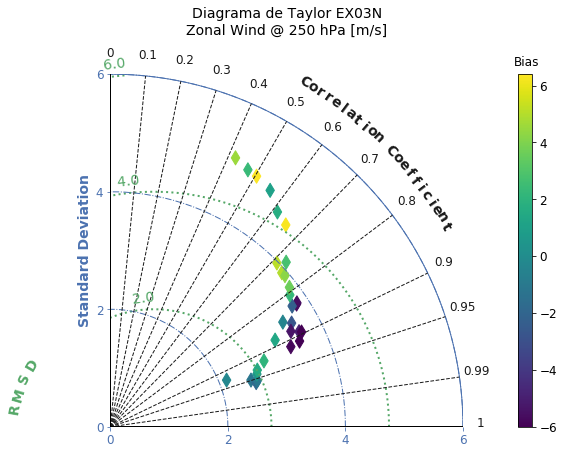

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


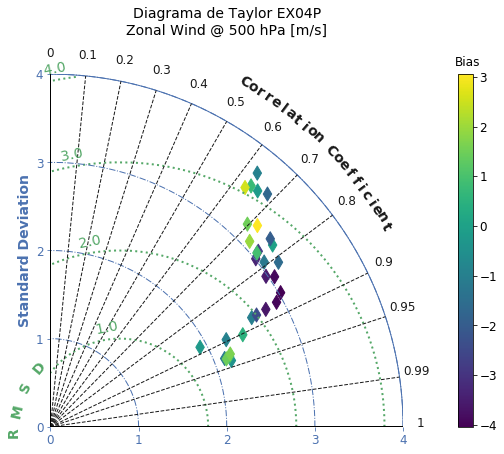

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


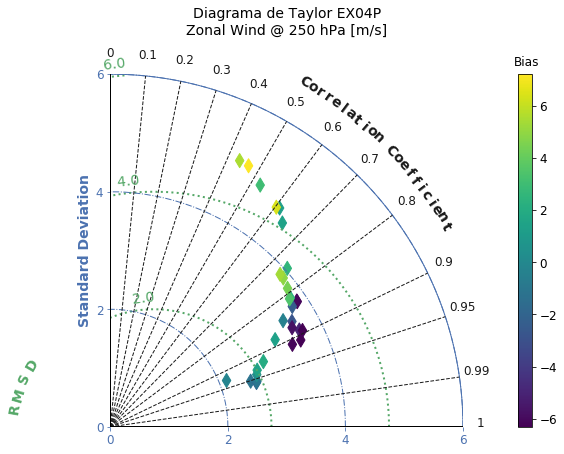

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


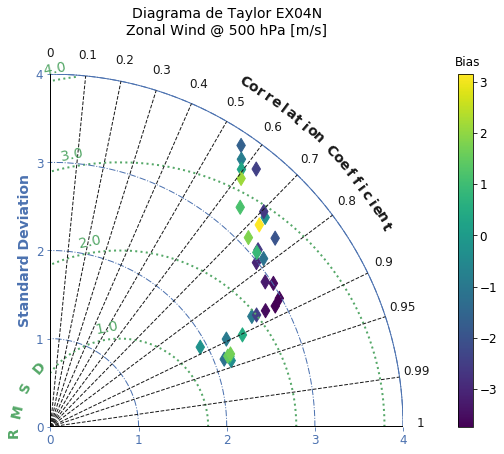

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


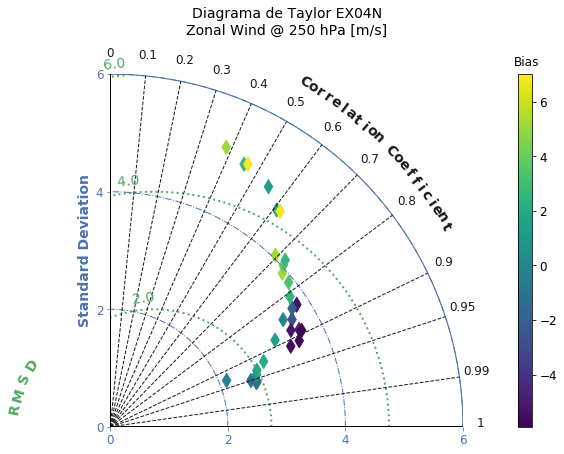

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


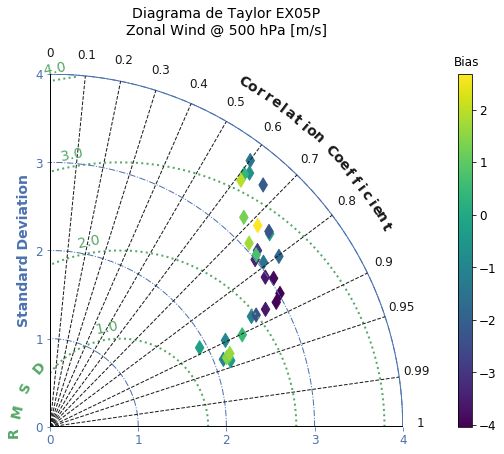

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


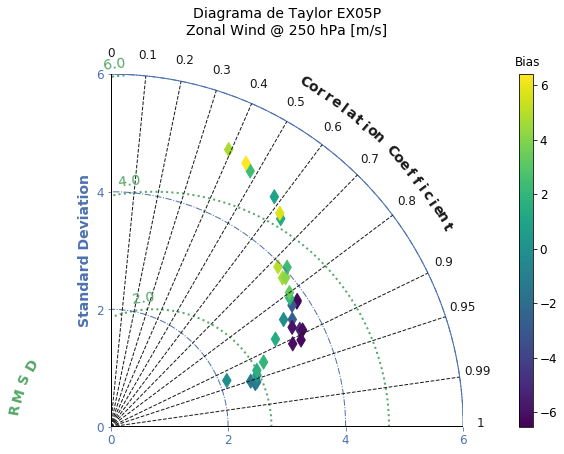

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


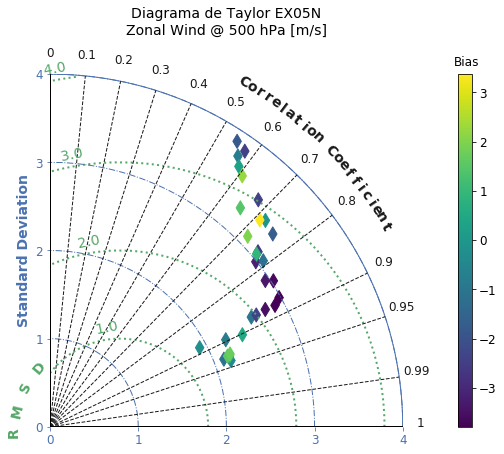

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


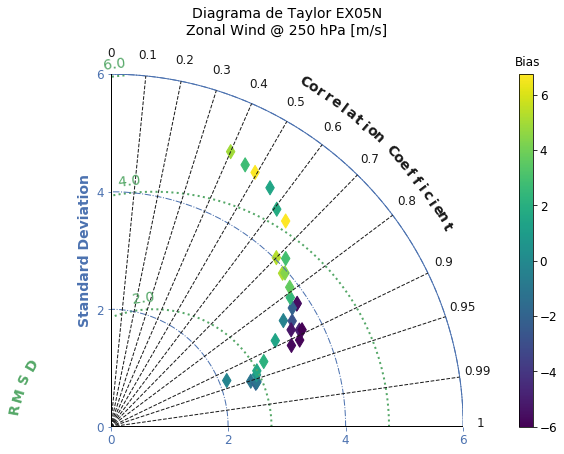

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


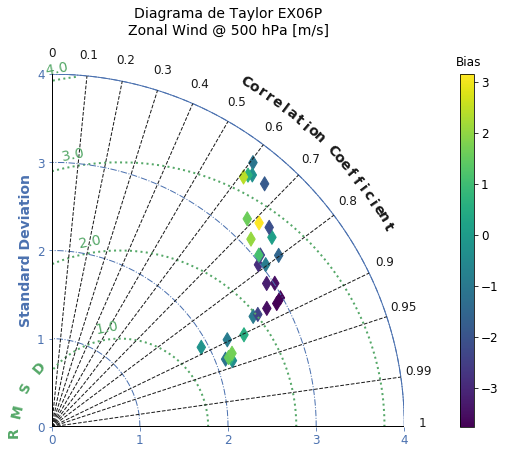

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


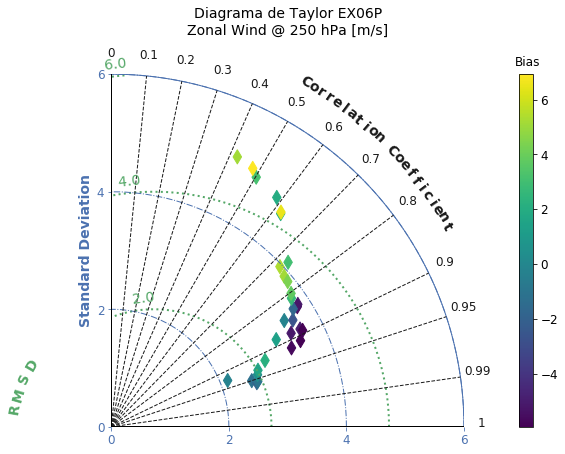

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


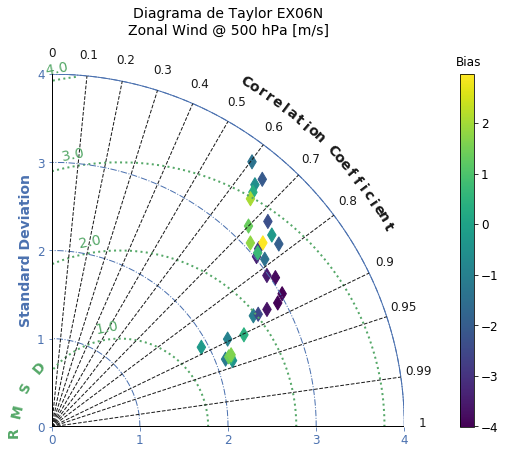

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


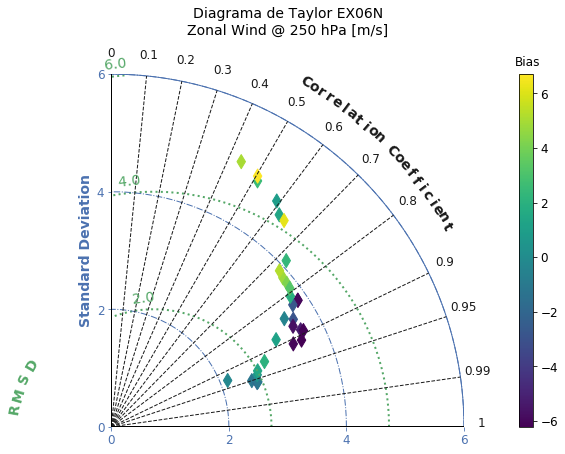

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


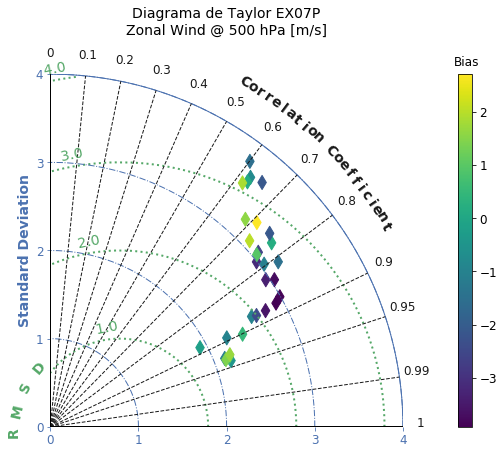

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


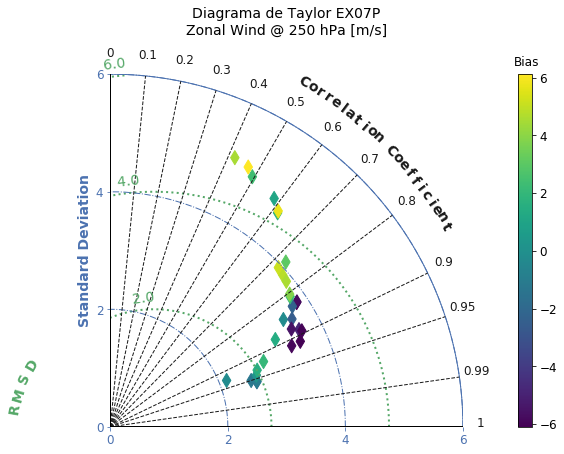

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


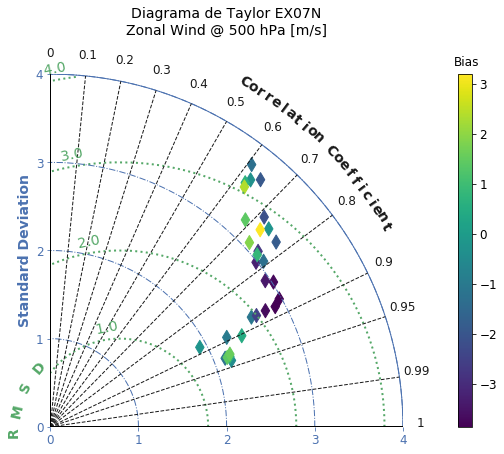

/opt/anaconda3/envs/SCANPLOT/lib/python3.8/site-packages/skill_metrics/get_taylor_diagram_options.py:139: RuntimeWarning: invalid value encountered in less
  negative = CORs[np.where(CORs < 0.0)]


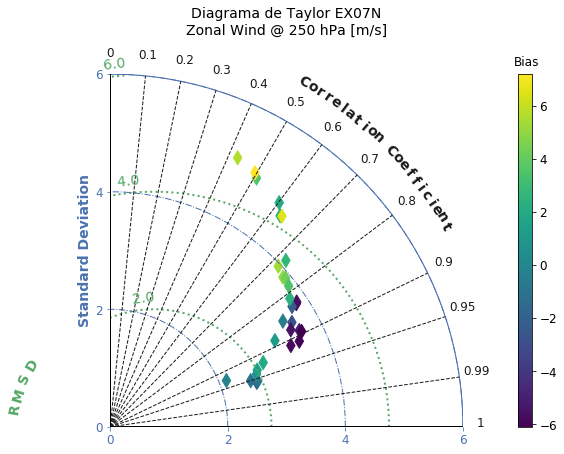

In [32]:
plot_dTaylor(dTable,data_conf,Vars,Stats,outDir)